<a href="https://colab.research.google.com/github/SonHyeok/Marine-distress-accident/blob/main/Marine_distress_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ● 해양 조난 사고 데이터 분석


## 1. 데이터셋 불러오기 및 데이터 정제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install bokeh

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import output_file, show
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns

In [4]:
#한글폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한글폰트 설정
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [155]:
df = pd.read_csv('/content/drive/MyDrive/개인 공공데이터 분석 자료/data/해양경찰청_해상조난사고 상세데이터 현황_20201231.csv', encoding='cp949')

## 데이터 분포 및 결측값 확인

In [6]:
df

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2020-12-30 08:34,12,8,평택,항계 내,36 | 57 | 0,126 | 50 | 1,황천6급,관리소홀,기타,1,0,0,0,0,0,유조선,169.00
1,2020-12-30 00:26,12,0,부산,항계 내,35 | 5 | 39,129 | 2 | 17,풍랑주의보,화기취급부주의,화재,1,0,0,0,0,0,유조선,32.00
2,2020-12-29 23:33,12,23,부산,영해-EEZ,34 | 46 | 40,129 | 9 | 19,풍랑주의보,정비불량,기관손상,1,8,8,0,0,0,어선,87.00
3,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,부유물감김,1,4,4,0,0,0,예부선,124.00
4,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,표류,1,23,23,0,0,0,예부선,600.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,2020-01-01 14:00,1,14,서귀포,영해-EEZ,33 | 17 | 44,127 | 11 | 30,양호,운항부주의,부유물감김,1,7,7,0,0,0,어선,29.00
3774,2020-01-01 13:03,1,13,울산,영해,35 | 22 | 58,129 | 21 | 18,황천6급,정비불량,추진기손상,1,1,1,0,0,0,어선,2.31
3775,2020-01-01 12:11,1,12,창원,항계 내,35 | 5 | 25,128 | 47 | 12,양호,정비불량,기관손상,1,3,3,0,0,0,모터보트,2.90
3776,2020-01-01 11:14,1,11,군산,영해,35 | 52 | 50,126 | 21 | 10,양호,운항부주의,침수,1,1,1,0,0,0,어선,1.18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생일시    3778 non-null   object 
 1   월별      3778 non-null   int64  
 2   시간대별    3778 non-null   int64  
 3   관할해경서   3778 non-null   object 
 4   발생해역    3778 non-null   object 
 5   위도      3778 non-null   object 
 6   경도      3778 non-null   object 
 7   기상상태    3778 non-null   object 
 8   발생원인    3778 non-null   object 
 9   발생유형    3778 non-null   object 
 10  사고선박수   3778 non-null   int64  
 11  발생인원    3778 non-null   int64  
 12  구조      3778 non-null   int64  
 13  부상      3778 non-null   int64  
 14  사망      3778 non-null   int64  
 15  실종      3778 non-null   int64  
 16  선 종     3778 non-null   object 
 17  톤수      3778 non-null   float64
dtypes: float64(1), int64(8), object(9)
memory usage: 531.4+ KB


In [8]:
df.head(5)
# 위도 경도를 사용하는거 보다는 관할 해경서를 통해 어느 영해에서 일어나느지 보는게 좋을듯(큰 범주로)
#발생인원이 0명인 곳은 정박돼있는 중에 사고가 난듯

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2020-12-30 08:34,12,8,평택,항계 내,36 | 57 | 0,126 | 50 | 1,황천6급,관리소홀,기타,1,0,0,0,0,0,유조선,169.0
1,2020-12-30 00:26,12,0,부산,항계 내,35 | 5 | 39,129 | 2 | 17,풍랑주의보,화기취급부주의,화재,1,0,0,0,0,0,유조선,32.0
2,2020-12-29 23:33,12,23,부산,영해-EEZ,34 | 46 | 40,129 | 9 | 19,풍랑주의보,정비불량,기관손상,1,8,8,0,0,0,어선,87.0
3,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,부유물감김,1,4,4,0,0,0,예부선,124.0
4,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,표류,1,23,23,0,0,0,예부선,600.0


In [9]:
df.tail(5)

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
3773,2020-01-01 14:00,1,14,서귀포,영해-EEZ,33 | 17 | 44,127 | 11 | 30,양호,운항부주의,부유물감김,1,7,7,0,0,0,어선,29.00
3774,2020-01-01 13:03,1,13,울산,영해,35 | 22 | 58,129 | 21 | 18,황천6급,정비불량,추진기손상,1,1,1,0,0,0,어선,2.31
3775,2020-01-01 12:11,1,12,창원,항계 내,35 | 5 | 25,128 | 47 | 12,양호,정비불량,기관손상,1,3,3,0,0,0,모터보트,2.90
3776,2020-01-01 11:14,1,11,군산,영해,35 | 52 | 50,126 | 21 | 10,양호,운항부주의,침수,1,1,1,0,0,0,어선,1.18
3777,2020-01-01 01:00,1,1,동해,공해,37 | 26 | 43,133 | 24 | 35,풍랑주의보,운항부주의,부유물감김,1,13,13,0,0,0,어선,89.00


In [10]:
df.isnull(  ).sum()

발생일시     0
월별       0
시간대별     0
관할해경서    0
발생해역     0
위도       0
경도       0
기상상태     0
발생원인     0
발생유형     0
사고선박수    0
발생인원     0
구조       0
부상       0
사망       0
실종       0
선 종      0
톤수       0
dtype: int64

## 간단한 시각화를 통한 데이터 이해

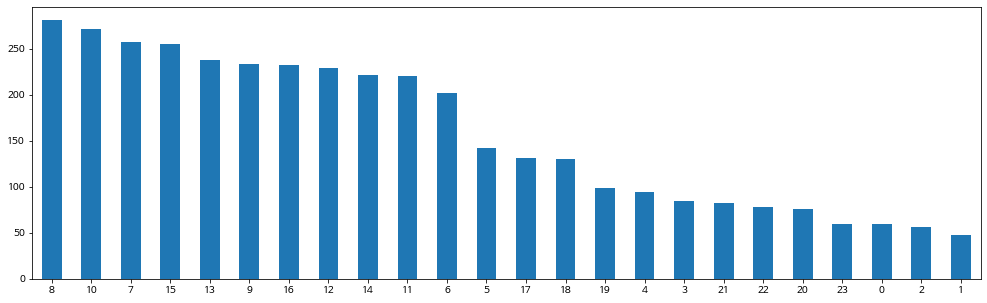

In [11]:
df['시간대별'].value_counts().plot.bar(rot = 0, figsize=(17,5))

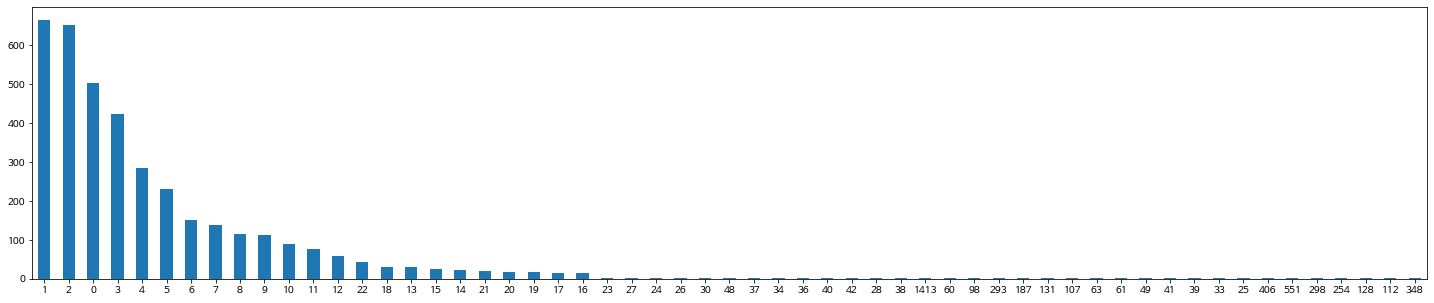

In [12]:
df['발생인원'].value_counts().plot.bar(rot = 0, figsize=(25,5))

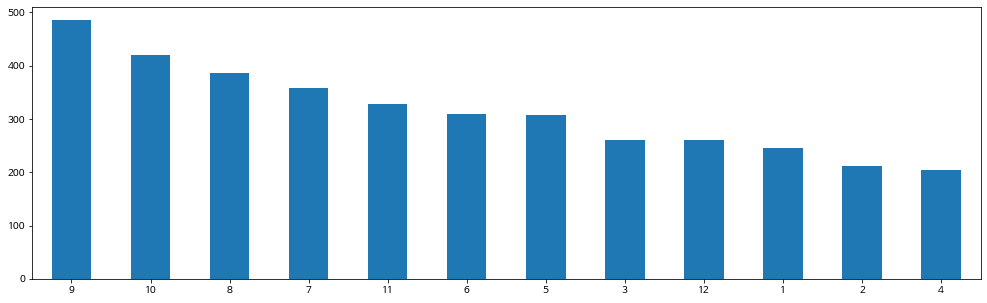

In [13]:
df['월별'].value_counts().plot.bar(rot = 0, figsize=(17,5))

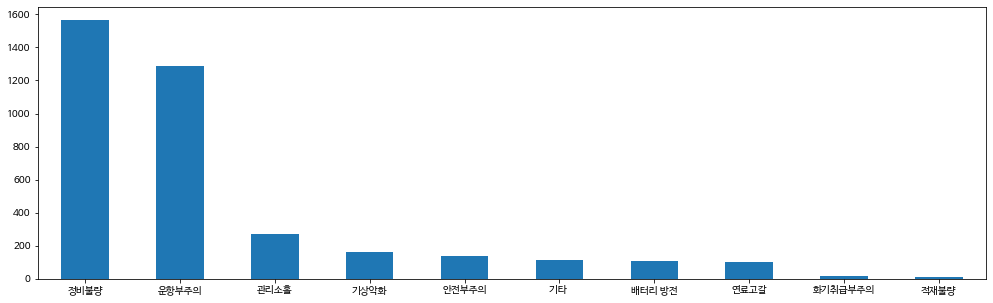

In [14]:
df['발생원인'].value_counts().plot.bar(rot = 0, figsize=(17,5))

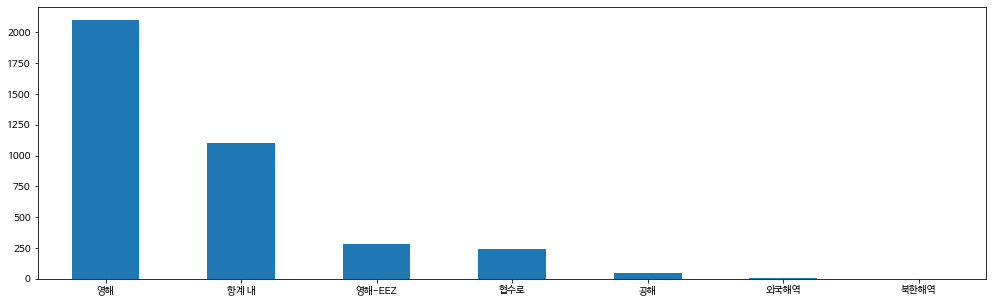

In [15]:
df['발생해역'].value_counts().plot.bar(rot = 0, figsize=(17,5))
# 영해 = 나라의 주권이 미치는 해역
# eez = 경제적 주권을 행사 하겠다고 선포한 해역
#협수로 = 항로 또는 수로의 폭이 좁은 곳
#공해 = 어느 나라의 주권에도 속하지 않으며, 모든 나라가 공통으로 사용할 수 있는 바다

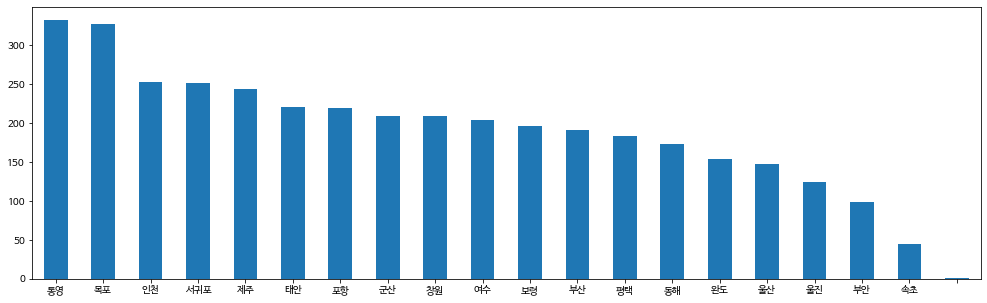

In [16]:
df['관할해경서'].value_counts().plot.bar(rot = 0, figsize=(17,5))
# 영해 별로 묶어서 나타내보기

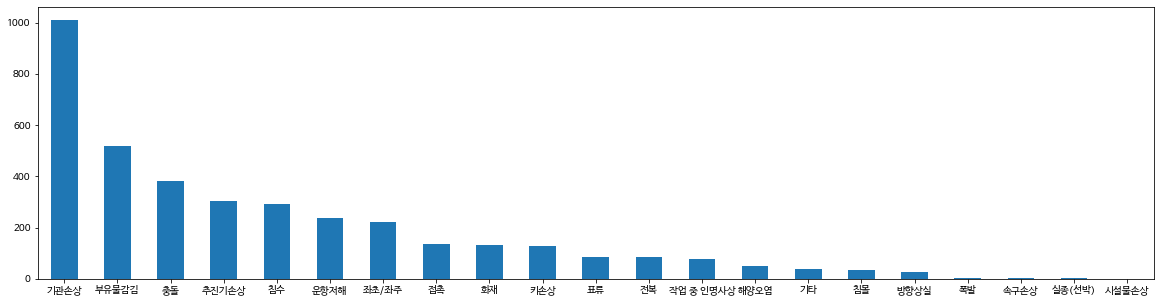

In [17]:
df['발생유형'].value_counts().plot.bar(rot = 0, figsize=(20,5))

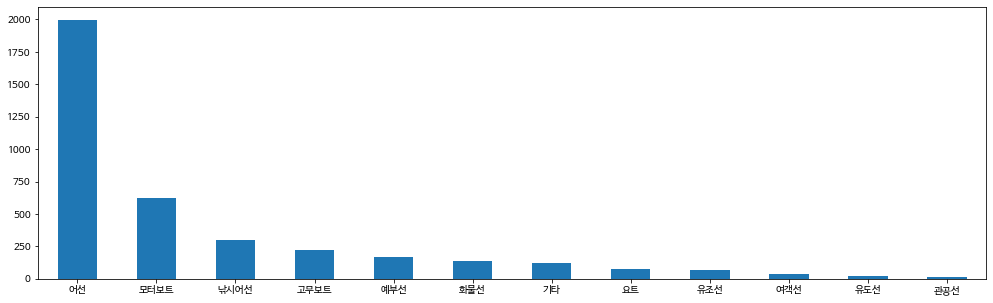

In [18]:
df['선 종'].value_counts().plot.bar(rot = 0, figsize=(17,5))

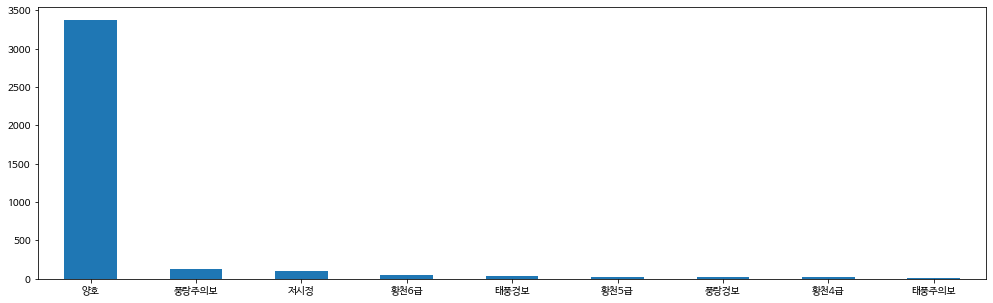

In [19]:
df['기상상태'].value_counts().plot.bar(rot = 0, figsize=(17,5))

## 데이터 프레임 생성

In [20]:
df_pe = pd.pivot_table(df, index=['발생인원'], values=['구조','부상','실종','사망'], aggfunc='sum')


#1. 월별 데이터 상관관계 확인

## 각 월마다 시간대별 사고 발생수 확인


In [21]:
# 각 월별 어느 시간에 가장 많이 사고가 발생했는지 확인하기 위해서 월별 데이터셋 생성
df_month_1 = df[df['월별'] == 1]['시간대별'].value_counts().to_frame()
df_month_2 = df[df['월별'] == 2]['시간대별'].value_counts().to_frame()
df_month_3 = df[df['월별'] == 3]['시간대별'].value_counts().to_frame()
df_month_4 = df[df['월별'] == 4]['시간대별'].value_counts().to_frame()
df_month_5 = df[df['월별'] == 5]['시간대별'].value_counts().to_frame()
df_month_6 = df[df['월별'] == 6]['시간대별'].value_counts().to_frame()
df_month_7 = df[df['월별'] == 7]['시간대별'].value_counts().to_frame()
df_month_8 = df[df['월별'] == 8]['시간대별'].value_counts().to_frame()
df_month_9 = df[df['월별'] == 9]['시간대별'].value_counts().to_frame()
df_month_10 = df[df['월별'] == 10]['시간대별'].value_counts().to_frame()
df_month_11 = df[df['월별'] == 11]['시간대별'].value_counts().to_frame()
df_month_12 = df[df['월별'] == 12]['시간대별'].value_counts().to_frame()

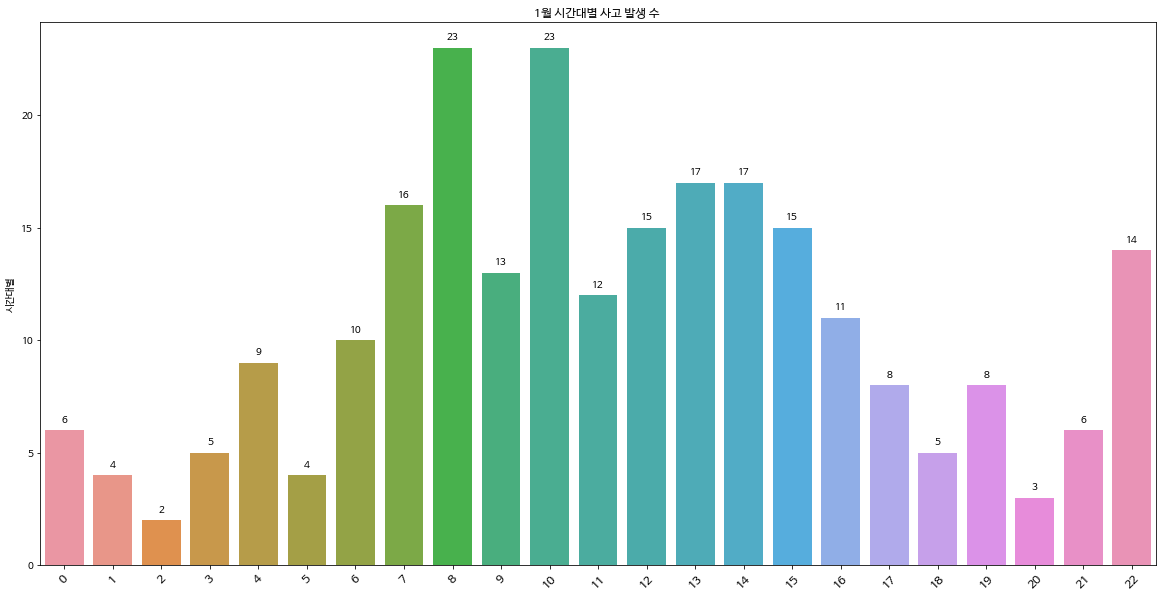

In [113]:
plt.figure(figsize=(20,10))
plt.title('1월 시간대별 사고 발생 수 ')
month_g_1 = sns.barplot(data = df_month_1, x = df_month_1.index, y = '시간대별', ci=None)

for p in month_g_1.patches:
    month_g_1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

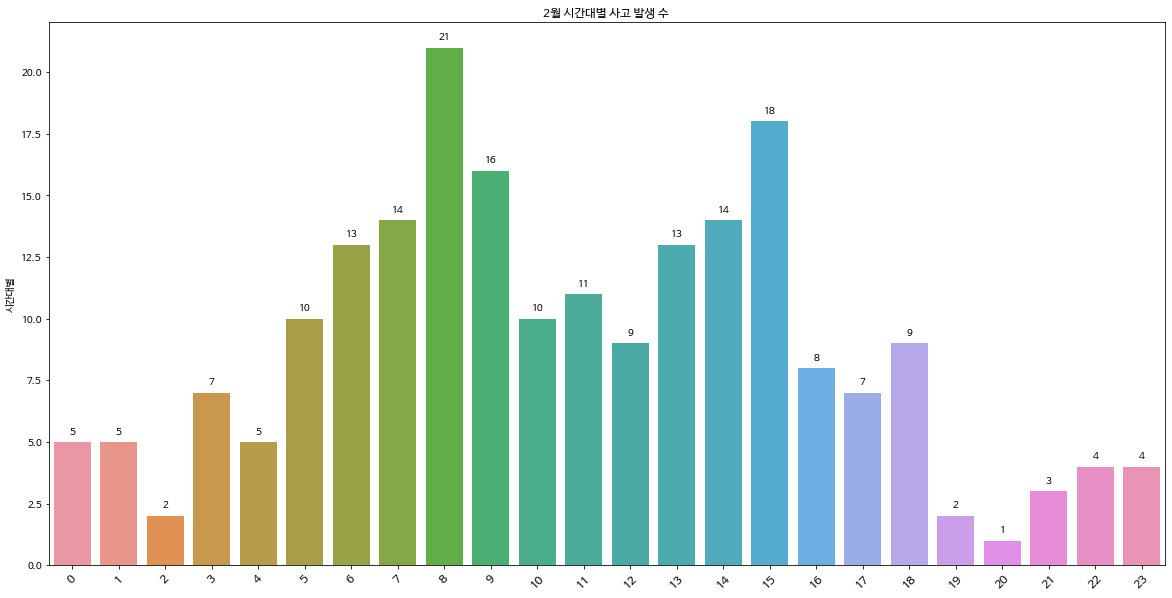

In [112]:
plt.figure(figsize=(20,10))
plt.title('2월 시간대별 사고 발생 수 ')
month_g_2 = sns.barplot(data = df_month_2, x = df_month_2.index, y = '시간대별', ci=None)

for p in month_g_2.patches:
    month_g_2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

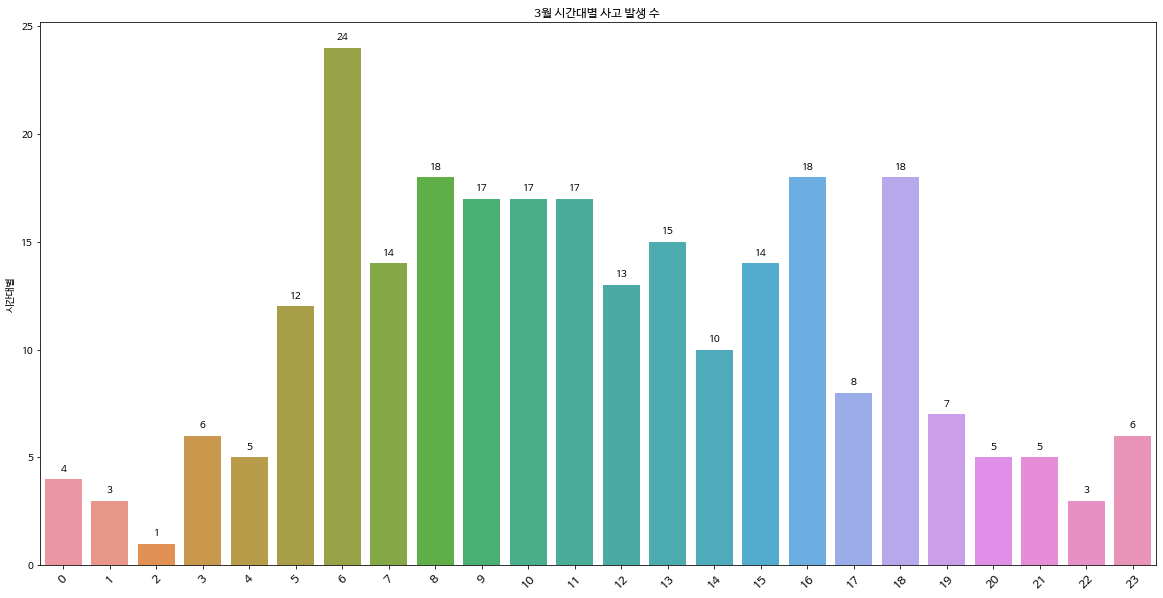

In [116]:
plt.figure(figsize=(20,10))
plt.title('3월 시간대별 사고 발생 수 ')
month_g_3 = sns.barplot(data = df_month_3, x = df_month_3.index, y = '시간대별', ci=None)

for p in month_g_3.patches:
    month_g_3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

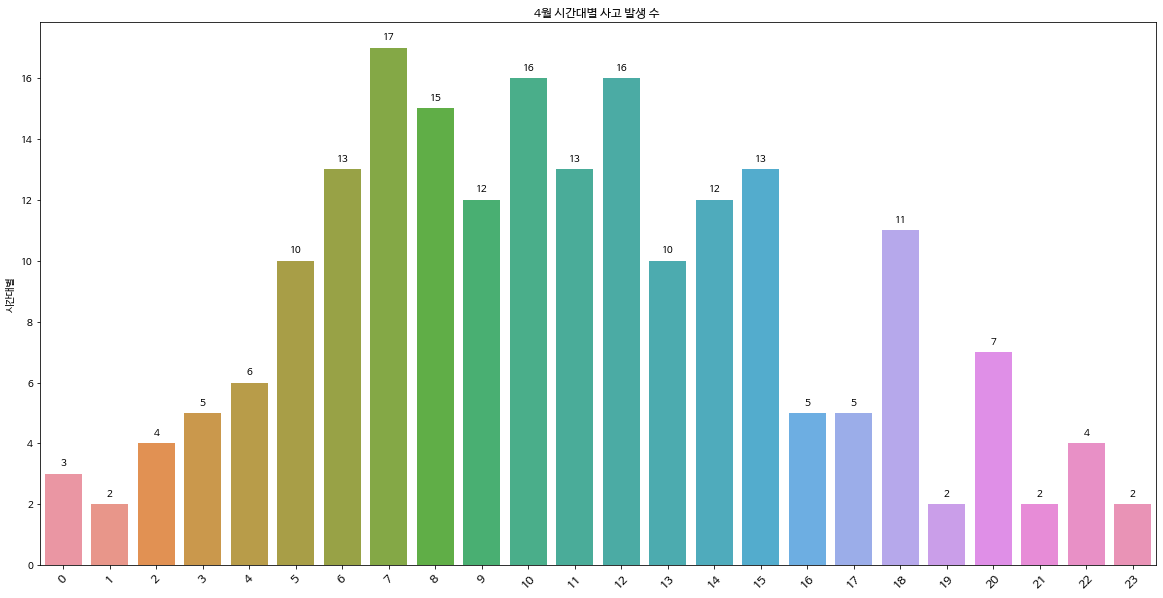

In [117]:
plt.figure(figsize=(20,10))
plt.title('4월 시간대별 사고 발생 수 ')
month_g_4 = sns.barplot(data = df_month_4, x = df_month_4.index, y = '시간대별', ci=None)

for p in month_g_4.patches:
    month_g_4.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

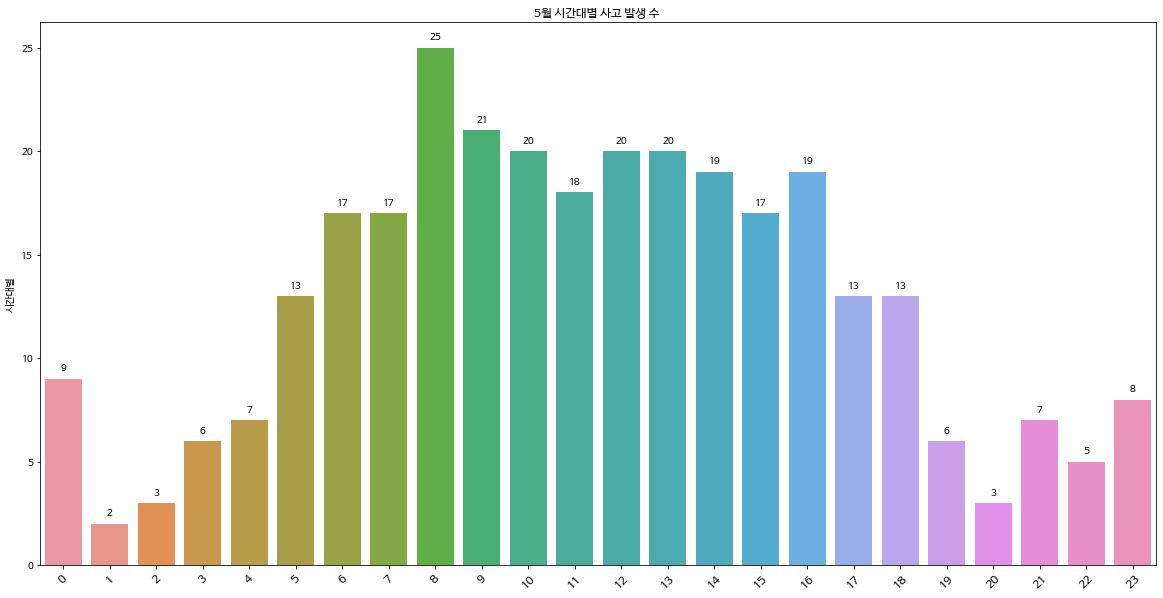

In [118]:
plt.figure(figsize=(20,10))
plt.title('5월 시간대별 사고 발생 수 ')
month_g_5 = sns.barplot(data = df_month_5, x = df_month_5.index, y = '시간대별', ci=None)

for p in month_g_5.patches:
    month_g_5.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

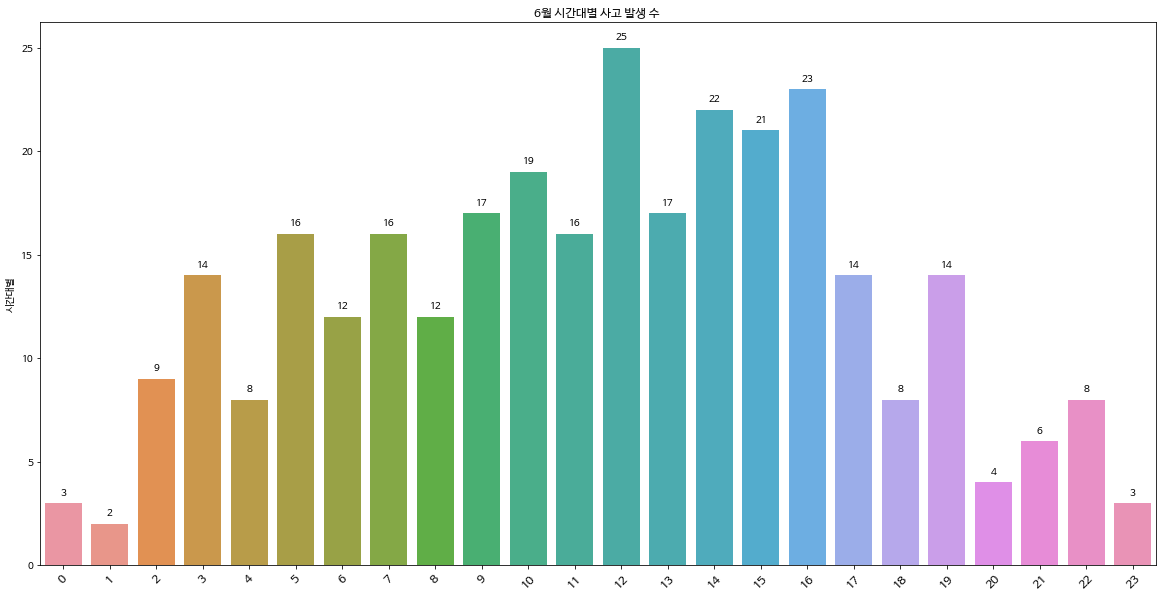

In [119]:
plt.figure(figsize=(20,10))
plt.title('6월 시간대별 사고 발생 수 ')
month_g_6 = sns.barplot(data = df_month_6, x = df_month_6.index, y = '시간대별', ci=None)

for p in month_g_6.patches:
    month_g_6.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

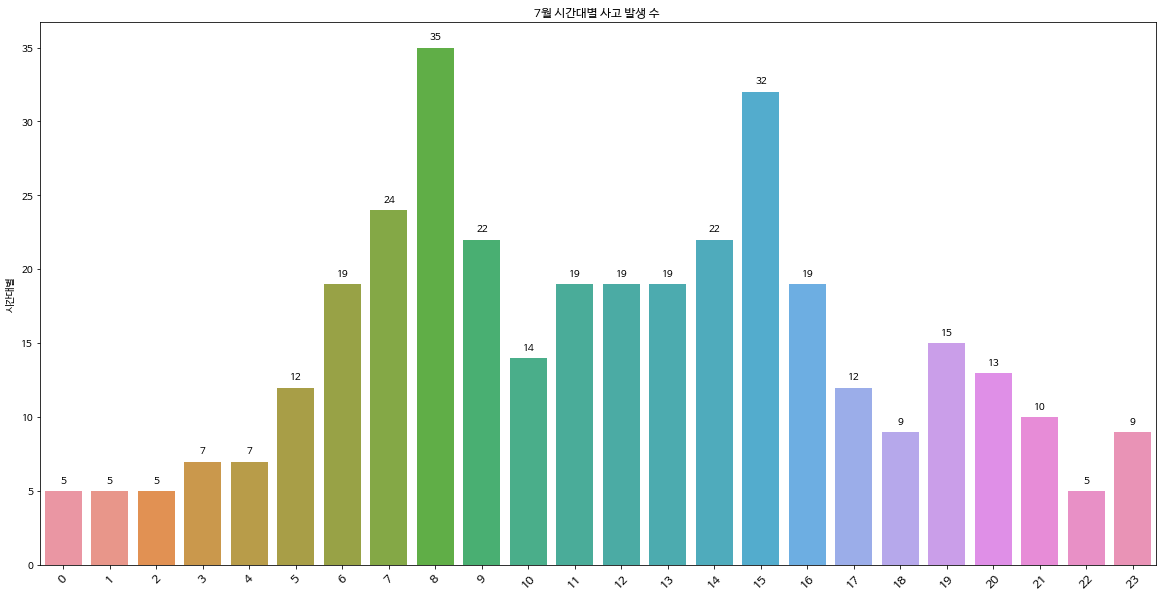

In [120]:
plt.figure(figsize=(20,10))
plt.title('7월 시간대별 사고 발생 수 ')
month_g_7 = sns.barplot(data = df_month_7, x = df_month_7.index, y = '시간대별', ci=None)

for p in month_g_7.patches:
    month_g_7.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

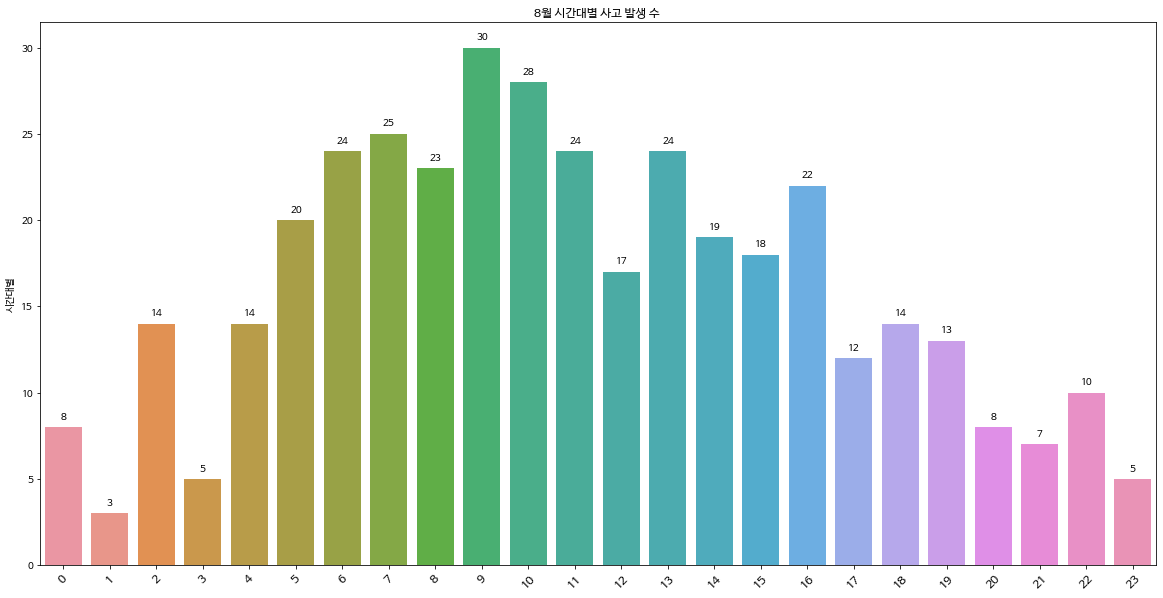

In [121]:
plt.figure(figsize=(20,10))
plt.title('8월 시간대별 사고 발생 수 ')
month_g_8 = sns.barplot(data = df_month_8, x = df_month_8.index, y = '시간대별', ci=None)

for p in month_g_8.patches:
    month_g_8.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

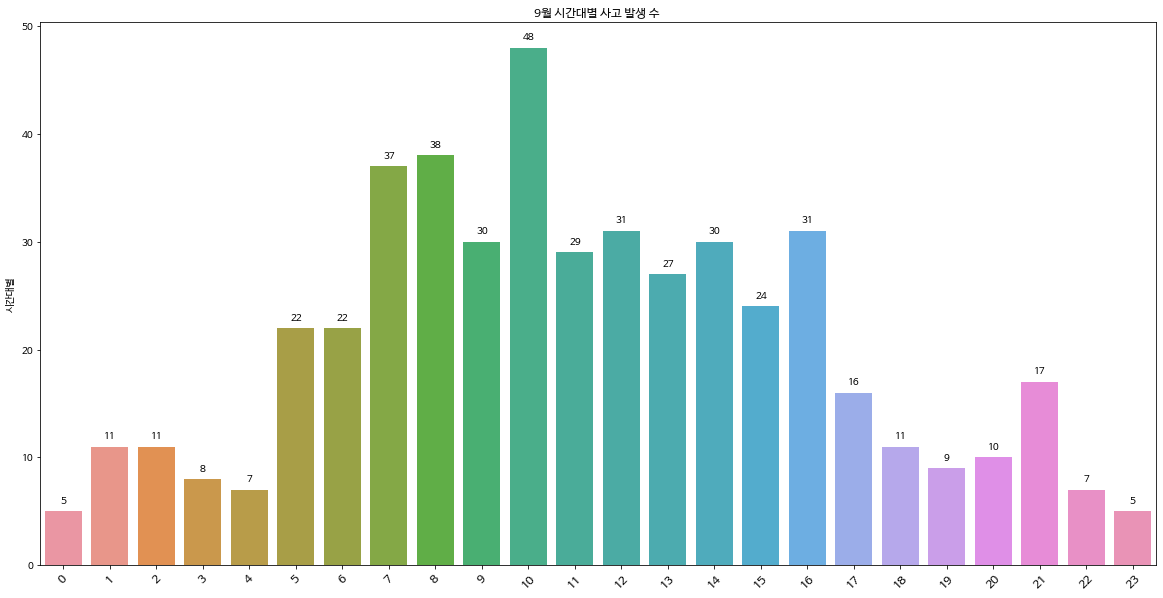

In [122]:
plt.figure(figsize=(20,10))
plt.title('9월 시간대별 사고 발생 수 ')
month_g_9 = sns.barplot(data = df_month_9, x = df_month_9.index, y = '시간대별', ci=None)

for p in month_g_9.patches:
    month_g_9.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

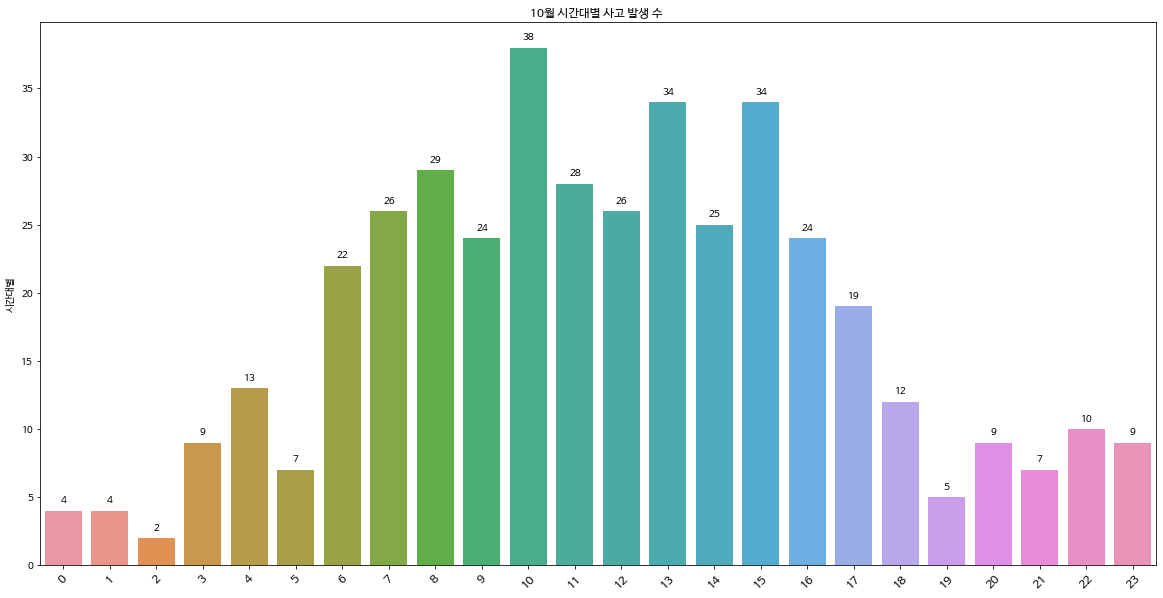

In [124]:
plt.figure(figsize=(20,10))
plt.title('10월 시간대별 사고 발생 수 ')
month_g_10 = sns.barplot(data = df_month_10, x = df_month_10.index, y = '시간대별', ci=None)

for p in month_g_10.patches:
    month_g_10.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

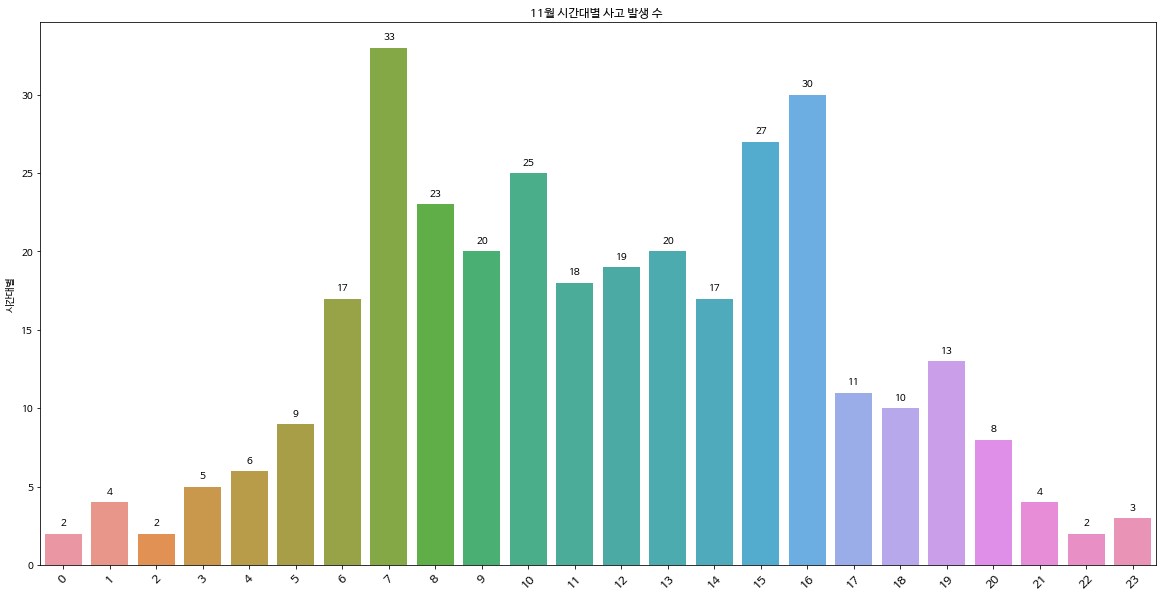

In [125]:
plt.figure(figsize=(20,10))
plt.title('11월 시간대별 사고 발생 수 ')
month_g_11 = sns.barplot(data = df_month_11, x = df_month_11.index, y = '시간대별', ci=None)

for p in month_g_11.patches:
    month_g_11.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

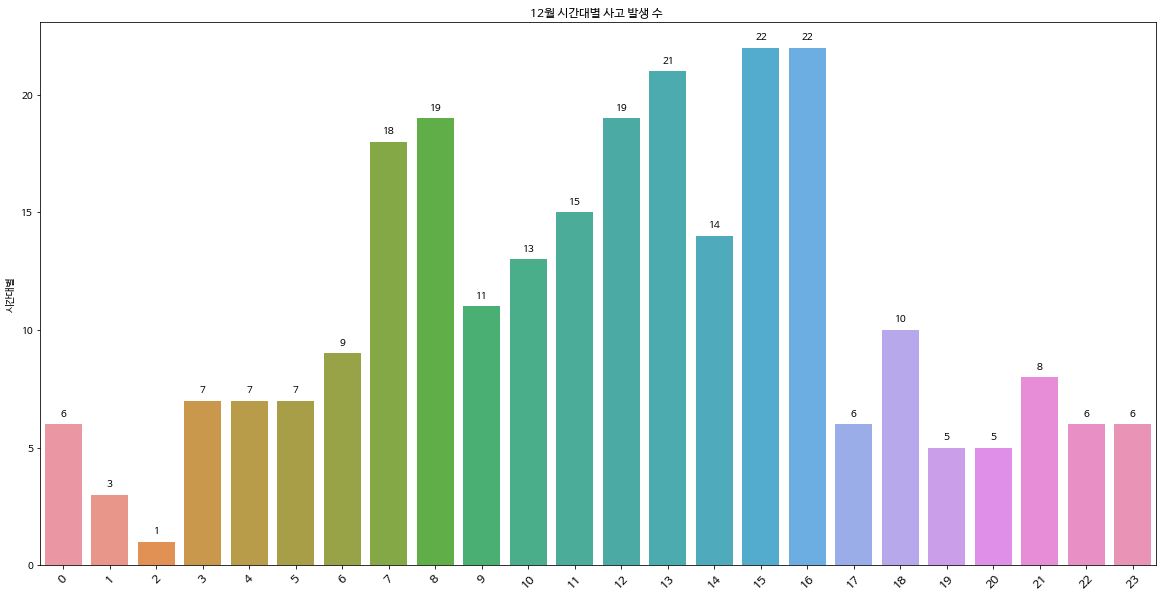

In [126]:
plt.figure(figsize=(20,10))
plt.title('12월 시간대별 사고 발생 수 ')
month_g_12 = sns.barplot(data = df_month_12, x = df_month_12.index, y = '시간대별', ci=None)

for p in month_g_12.patches:
    month_g_12.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

## 각 월마다 발생유형 확인

In [46]:
df_type_1 = df[df['월별'] == 1]['발생유형'].value_counts().to_frame()
df_type_2 = df[df['월별'] == 2]['발생유형'].value_counts().to_frame()
df_type_3 = df[df['월별'] == 3]['발생유형'].value_counts().to_frame()
df_type_4 = df[df['월별'] == 4]['발생유형'].value_counts().to_frame()
df_type_5 = df[df['월별'] == 5]['발생유형'].value_counts().to_frame()
df_type_6 = df[df['월별'] == 6]['발생유형'].value_counts().to_frame()
df_type_7 = df[df['월별'] == 7]['발생유형'].value_counts().to_frame()
df_type_8 = df[df['월별'] == 8]['발생유형'].value_counts().to_frame()
df_type_9 = df[df['월별'] == 9]['발생유형'].value_counts().to_frame()
df_type_10 = df[df['월별'] == 10]['발생유형'].value_counts().to_frame()
df_type_11 = df[df['월별'] == 11]['발생유형'].value_counts().to_frame()
df_type_12 = df[df['월별'] == 12]['발생유형'].value_counts().to_frame()

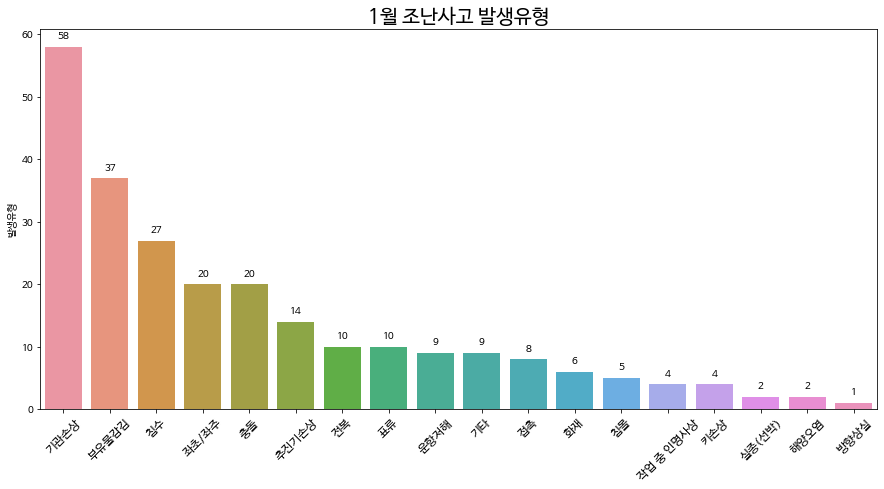

In [47]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_1, x=df_type_1.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('1월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

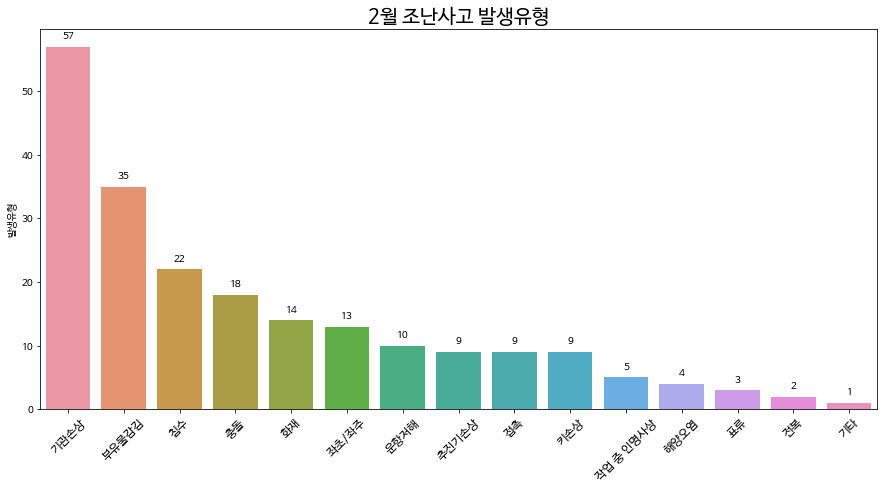

In [48]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_2, x=df_type_2.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('2월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

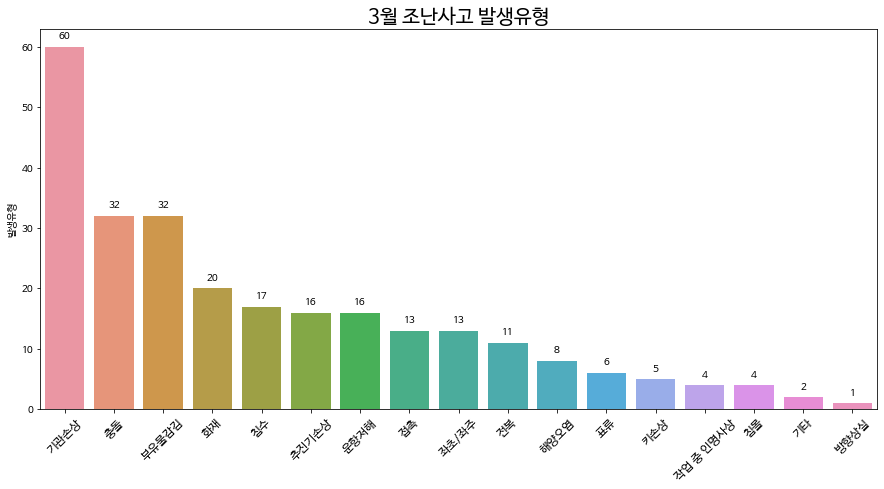

In [49]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_3, x=df_type_3.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('3월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

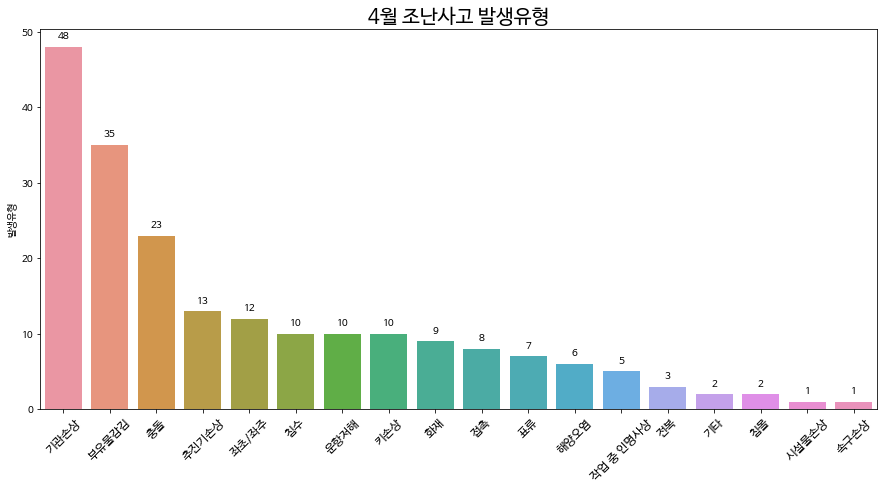

In [50]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_4, x=df_type_4.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('4월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

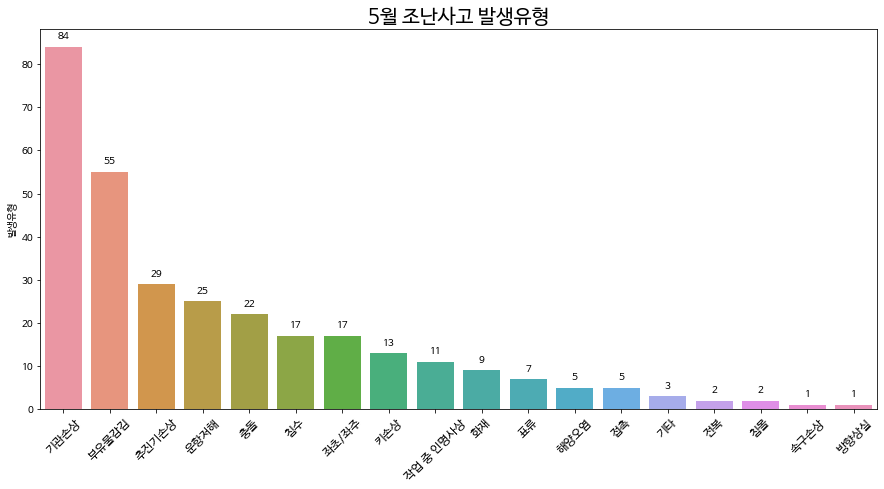

In [51]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_5, x=df_type_5.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('5월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

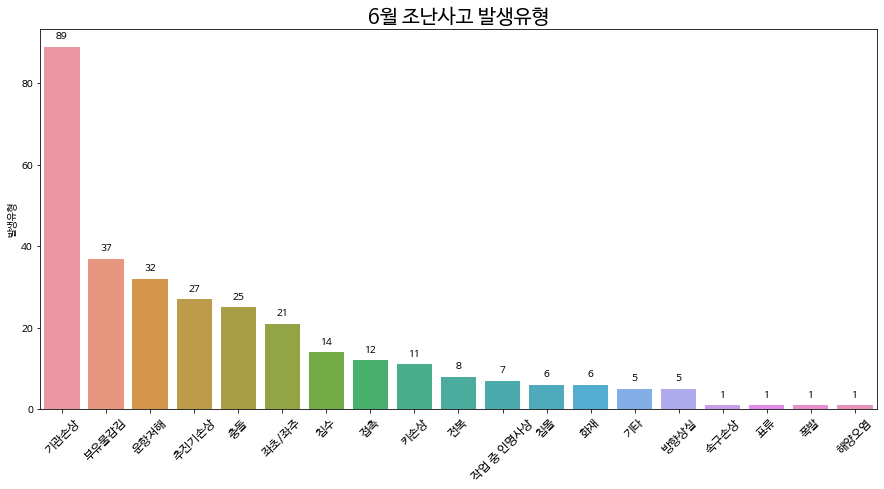

In [52]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_6, x=df_type_6.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('6월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

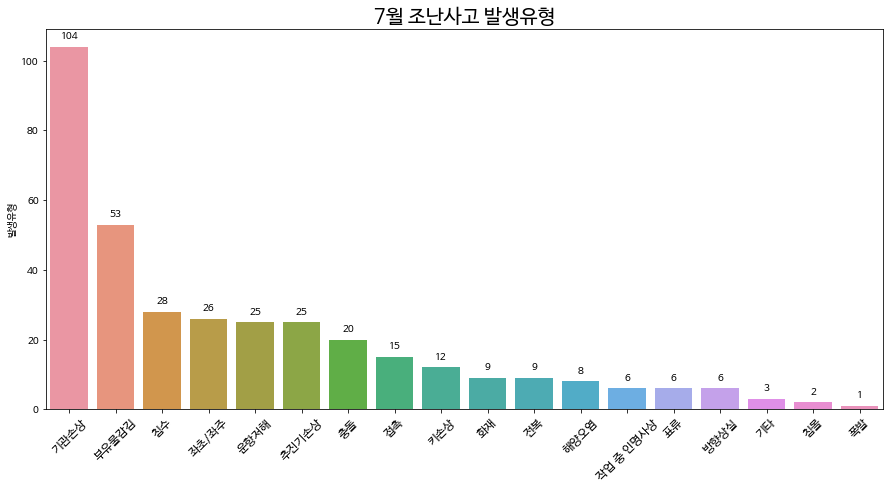

In [53]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_7, x=df_type_7.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('7월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

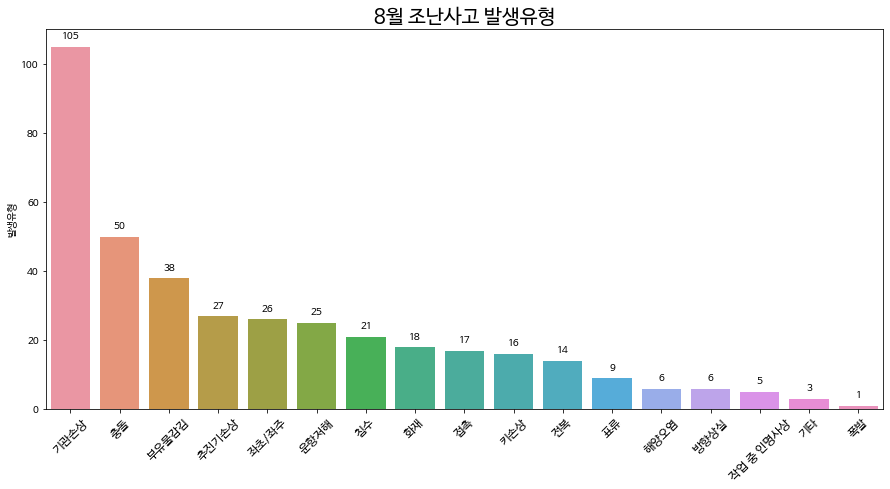

In [54]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_8, x=df_type_8.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('8월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

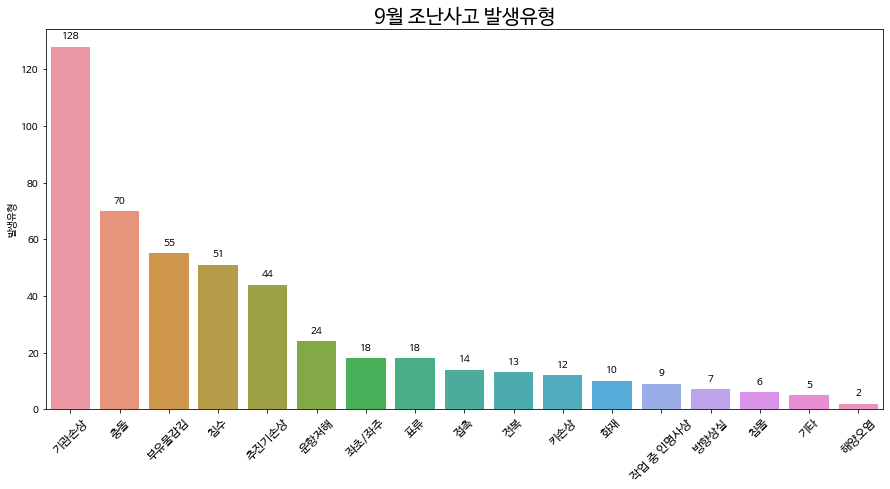

In [55]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_9, x=df_type_9.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('9월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

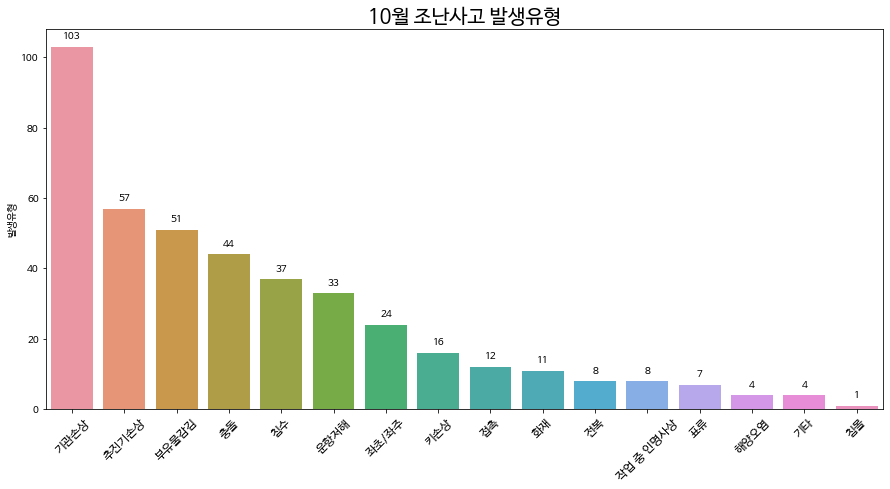

In [56]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_10, x=df_type_10.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('10월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

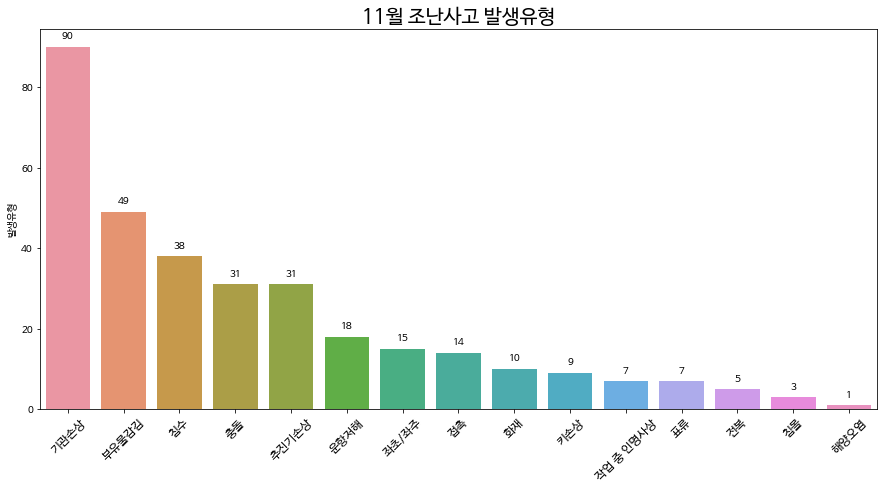

In [57]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_11, x=df_type_11.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('11월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

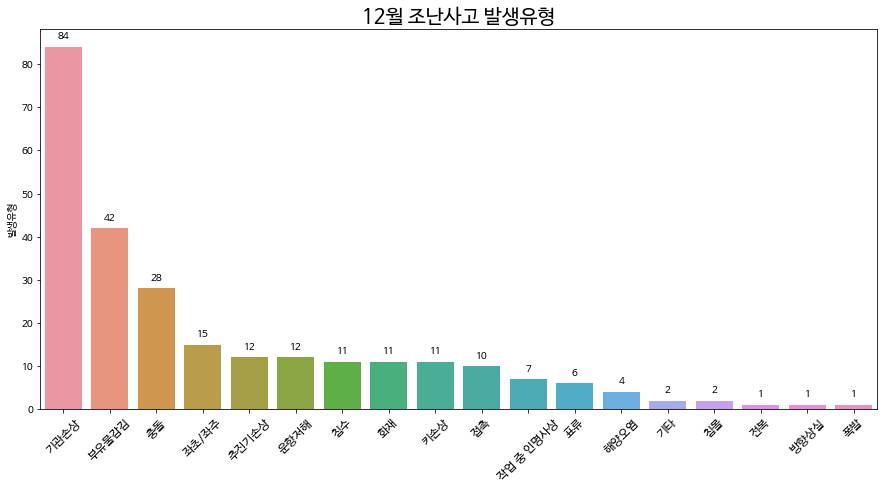

In [58]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_12, x=df_type_12.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('12월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

#2. 기상 상태별 데이터 상관관계 확인

## 기상 상태별 발생원인 확인



In [59]:
df['기상상태'].value_counts()

양호       3375
풍랑주의보     131
저시정       104
황천6급       49
태풍경보       33
황천5급       29
풍랑경보       27
황천4급       26
태풍주의보       4
Name: 기상상태, dtype: int64

In [60]:
df_weather_1 = df[df['기상상태']=='양호']['발생원인'].value_counts().to_frame()
df_weather_1

,발생원인
정비불량,1477
운항부주의,1210
관리소홀,228
안전부주의,130
연료고갈,97
배터리 방전,96
기타,89
기상악화,21
화기취급부주의,15
적재불량,12


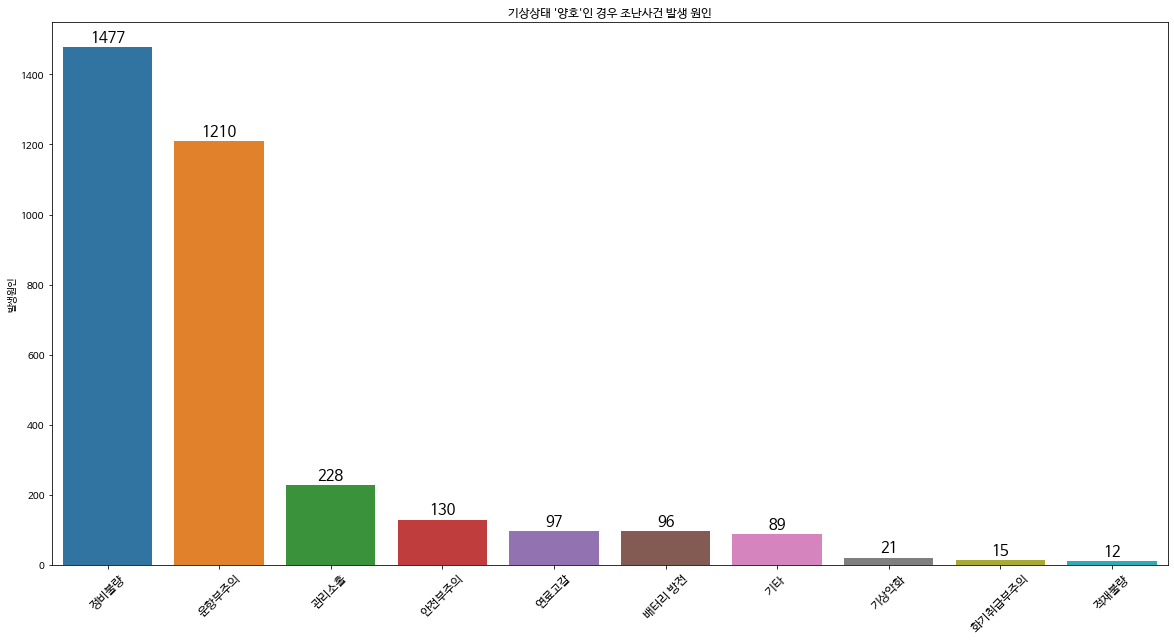

In [248]:
plt.figure(figsize = (20,10))
weather_g_1 = sns.barplot(data = df_weather_1, x=df_weather_1.index, y ='발생원인', ci=None)

for p in weather_g_1.patches:
    weather_g_1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)

plt.title("기상상태 '양호'인 경우 조난사건 발생 원인")
plt.show()

In [62]:
df_weather_2 = df[df['기상상태']=='풍랑주의보']['발생원인'].value_counts().to_frame()
df_weather_2


,발생원인
기상악화,47
정비불량,26
운항부주의,19
관리소홀,16
기타,11
안전부주의,5
화기취급부주의,3
배터리 방전,2
적재불량,1
연료고갈,1


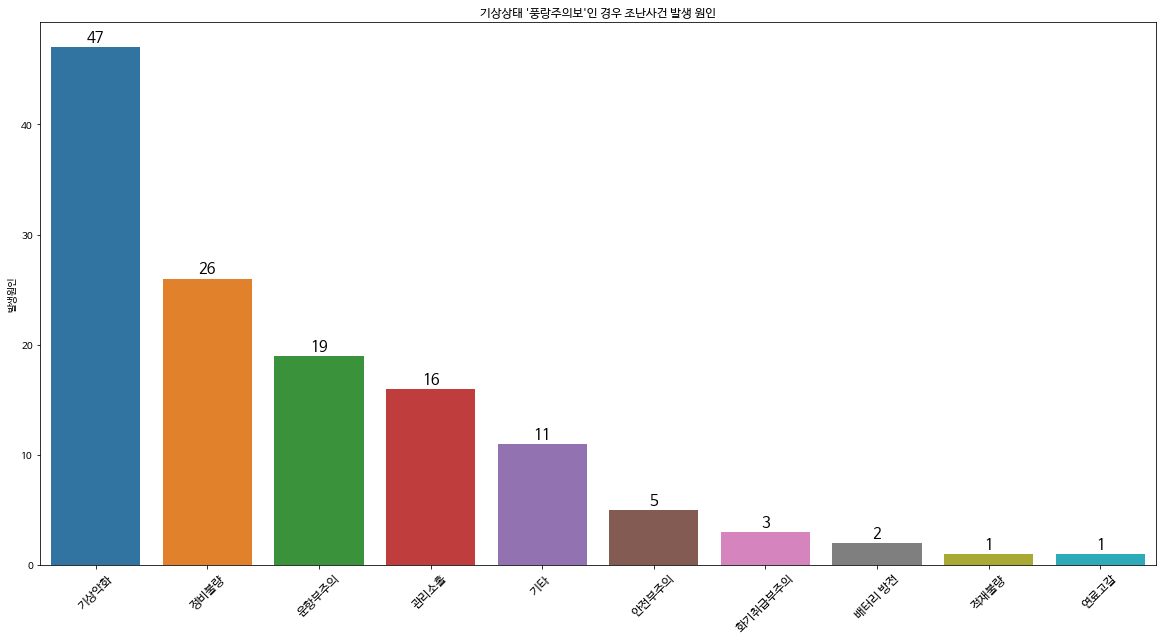

In [247]:
plt.figure(figsize = (20,10))
weather_g_2 = sns.barplot(data = df_weather_2, x=df_weather_2.index, y ='발생원인', ci=None)

for p in weather_g_2.patches:
    weather_g_2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '풍랑주의보'인 경우 조난사건 발생 원인")
plt.show()

In [64]:
df_weather_3 = df[df['기상상태']=='저시정']['발생원인'].value_counts().to_frame()
df_weather_3


,발생원인
운항부주의,36
정비불량,29
기상악화,20
관리소홀,9
배터리 방전,6
연료고갈,2
기타,1
안전부주의,1


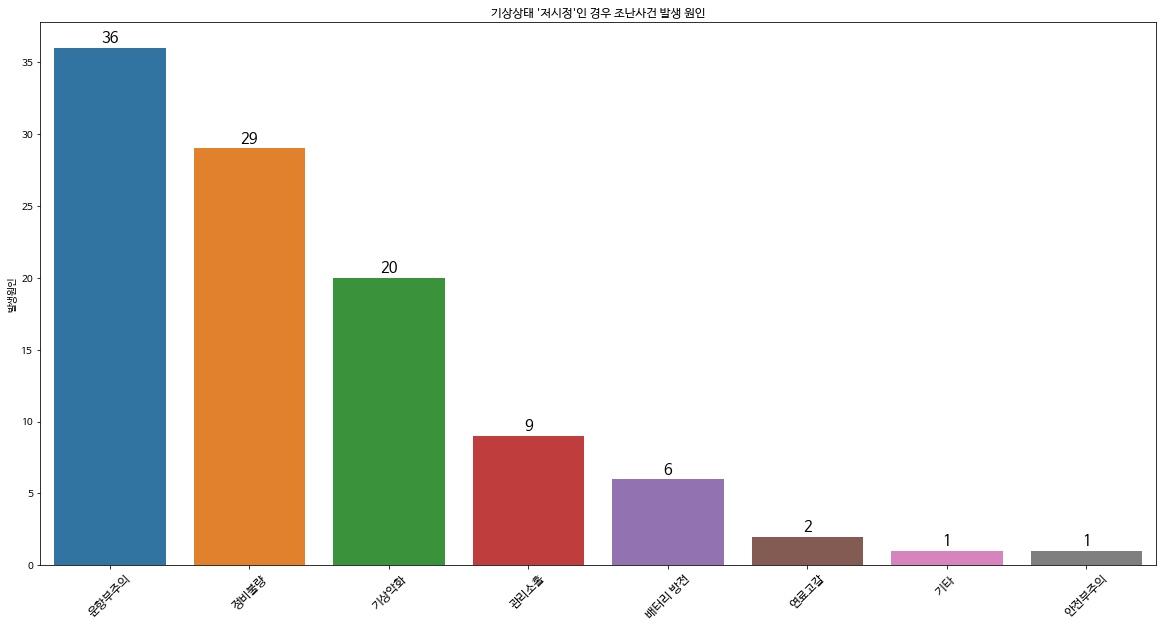

In [246]:
plt.figure(figsize = (20,10))
weather_g_3 = sns.barplot(data = df_weather_3, x=df_weather_3.index, y ='발생원인', ci=None)

for p in weather_g_3.patches:
    weather_g_3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '저시정'인 경우 조난사건 발생 원인")
plt.show()

In [66]:
df_weather_4 = df[df['기상상태']=='황천6급']['발생원인'].value_counts().to_frame()
df_weather_4

,발생원인
정비불량,21
운항부주의,8
기타,8
기상악화,6
관리소홀,4
배터리 방전,1
연료고갈,1


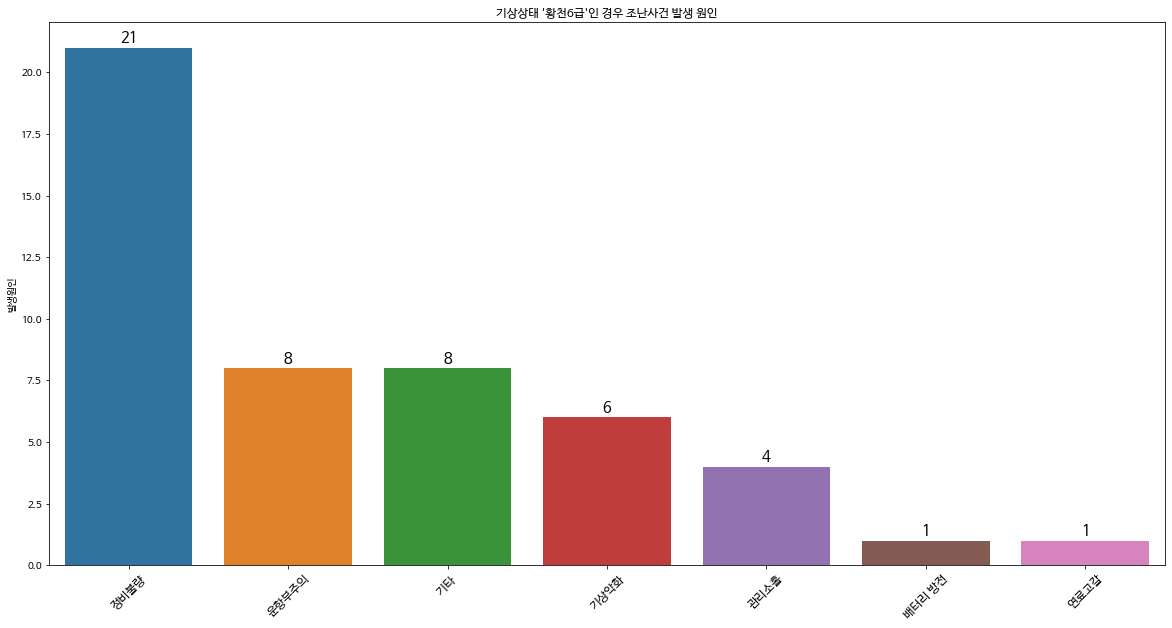

In [245]:
plt.figure(figsize = (20,10))
weather_g_4 = sns.barplot(data = df_weather_4, x=df_weather_4.index, y ='발생원인', ci=None)

for p in weather_g_4.patches:
    weather_g_4.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '황천6급'인 경우 조난사건 발생 원인")
plt.show()

In [68]:
df_weather_5 = df[df['기상상태']=='태풍경보']['발생원인'].value_counts().to_frame()
df_weather_5

,발생원인
기상악화,30
정비불량,2
운항부주의,1


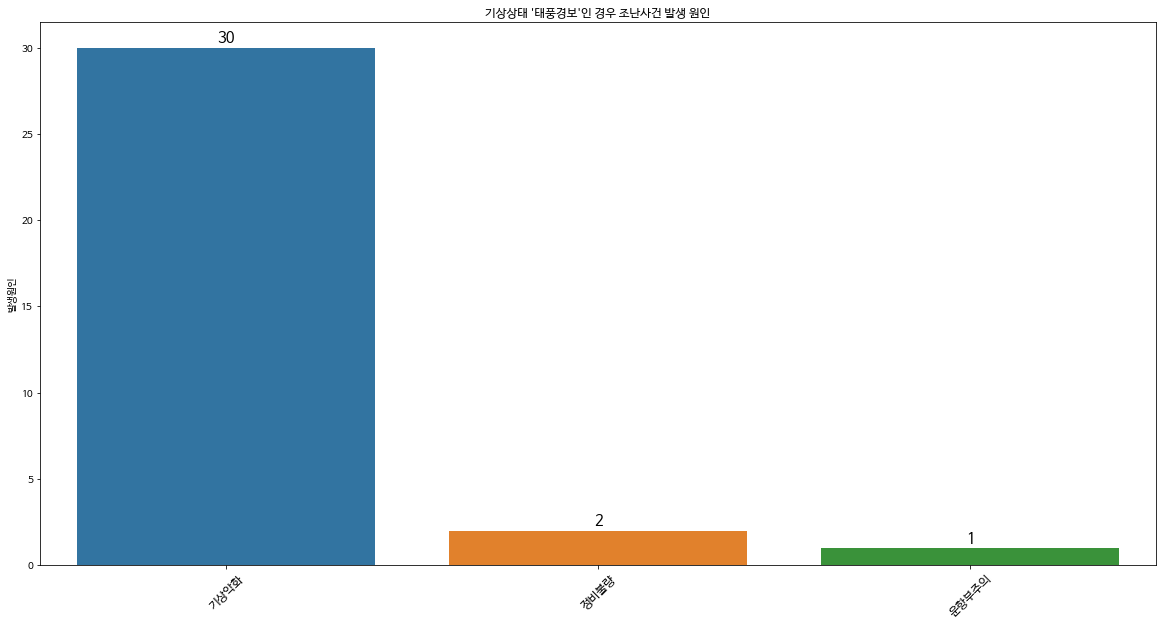

In [244]:
plt.figure(figsize = (20,10))
weather_g_5 = sns.barplot(data = df_weather_5, x=df_weather_5.index, y ='발생원인', ci=None)

for p in weather_g_5.patches:
    weather_g_5.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '태풍경보'인 경우 조난사건 발생 원인")
plt.show()

In [70]:
# 황천5급       29
# 풍랑경보       27
# 황천4급       26
# 태풍주의보 


In [71]:
df_weather_6 = df[df['기상상태']=='황천5급']['발생원인'].value_counts().to_frame()
df_weather_6

,발생원인
운항부주의,10
정비불량,7
기상악화,7
관리소홀,2
연료고갈,1
기타,1
화기취급부주의,1


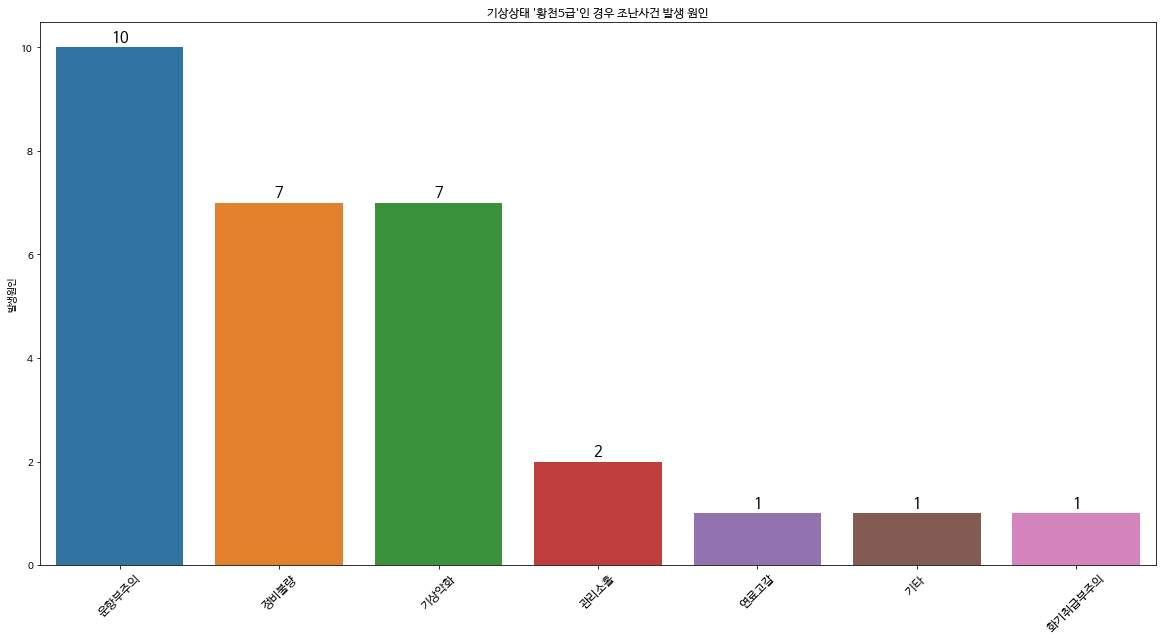

In [243]:
plt.figure(figsize = (20,10))
weather_g_6 = sns.barplot(data = df_weather_6, x=df_weather_6.index, y ='발생원인', ci=None)

for p in weather_g_6.patches:
    weather_g_6.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '황천5급'인 경우 조난사건 발생 원인")
plt.show()

In [73]:
df_weather_7 = df[df['기상상태']=='풍랑경보']['발생원인'].value_counts().to_frame()
df_weather_7

,발생원인
관리소홀,12
기상악화,10
정비불량,3
기타,1
운항부주의,1


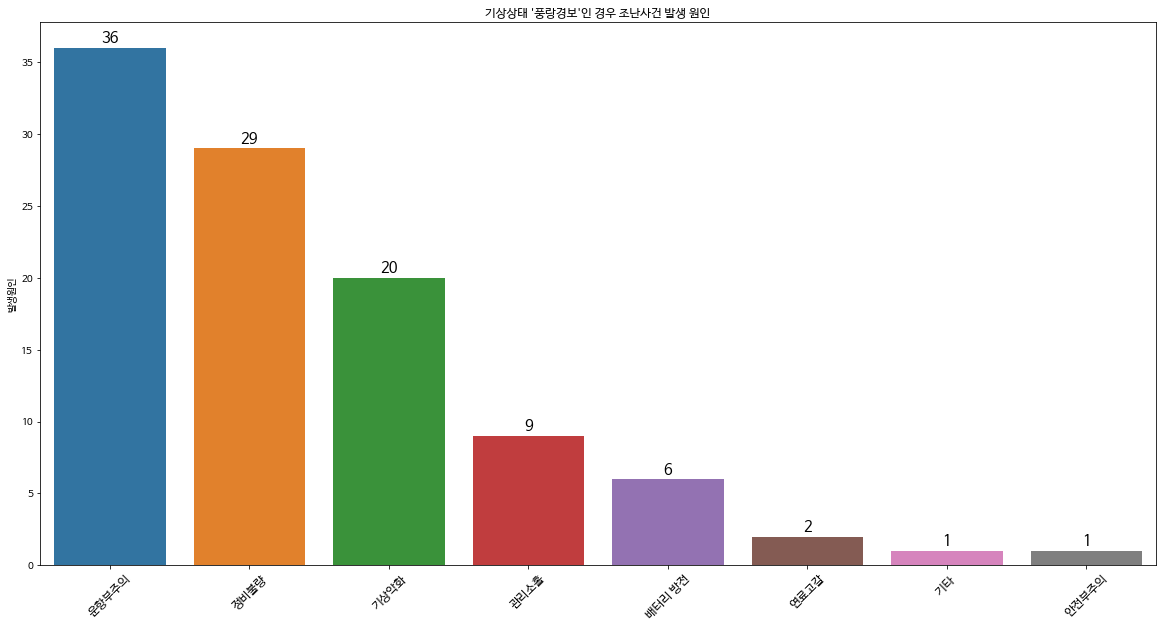

In [242]:
plt.figure(figsize = (20,10))
weather_g_7 = sns.barplot(data = df_weather_3, x=df_weather_3.index, y ='발생원인', ci=None)

for p in weather_g_7.patches:
    weather_g_7.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '풍랑경보'인 경우 조난사건 발생 원인")
plt.show()

In [75]:
df_weather_8 = df[df['기상상태']=='황천4급']['발생원인'].value_counts().to_frame()
df_weather_8

,발생원인
기상악화,19
운항부주의,3
관리소홀,3
정비불량,1


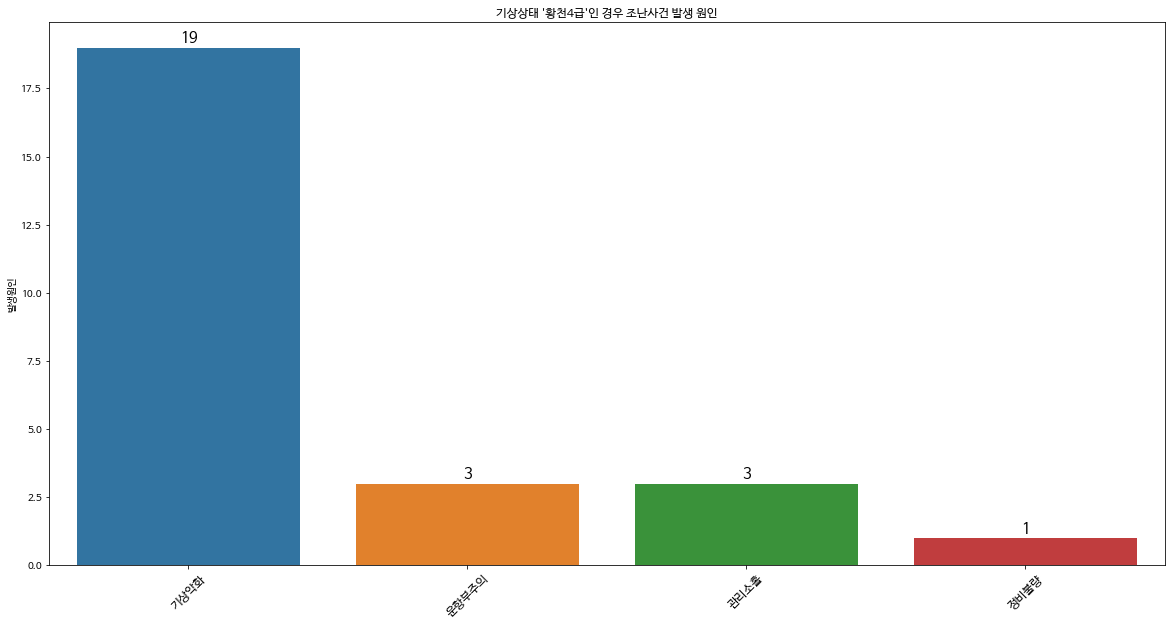

In [240]:
plt.figure(figsize = (20,10))
weather_g_8 = sns.barplot(data = df_weather_8, x=df_weather_8.index, y ='발생원인', ci=None)

for p in weather_g_8.patches:
    weather_g_8.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '황천4급'인 경우 조난사건 발생 원인")
plt.show()

In [77]:
df_weather_9 = df[df['기상상태']=='태풍주의보']['발생원인'].value_counts().to_frame()
df_weather_9

,발생원인
기상악화,3
운항부주의,1


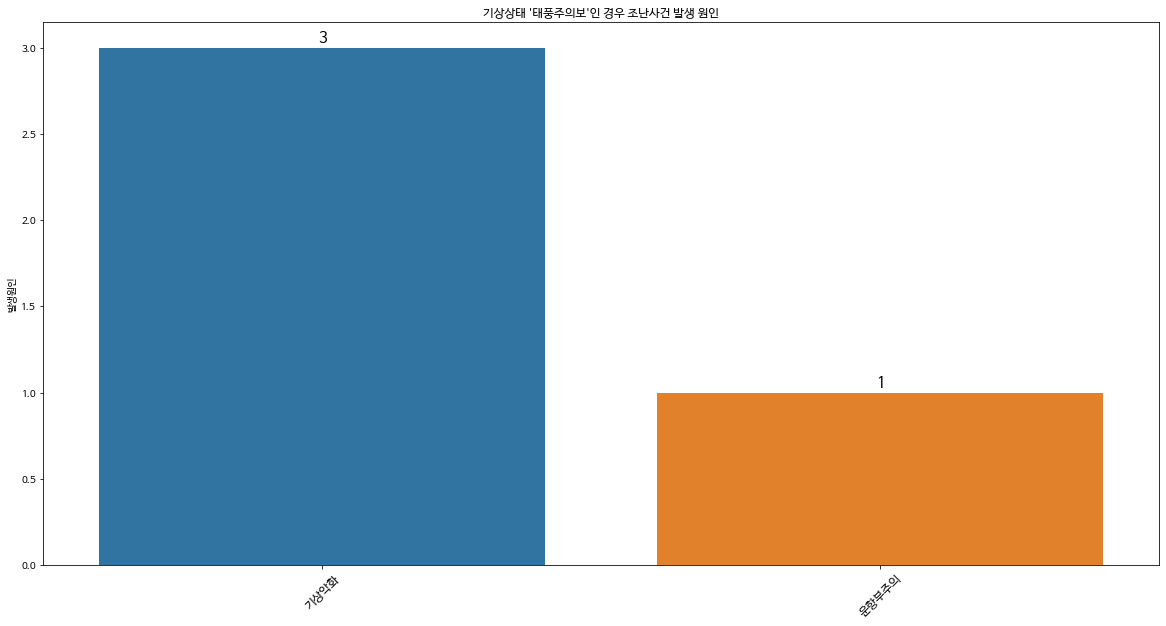

In [241]:
plt.figure(figsize = (20,10))
weather_g_9 = sns.barplot(data = df_weather_9, x=df_weather_9.index, y ='발생원인', ci=None)

for p in weather_g_9.patches:
    weather_g_9.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=15, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.title("기상상태 '태풍주의보'인 경우 조난사건 발생 원인")
plt.show()

## 기상 상태별 발생유형 확인

In [79]:
df_cause_1 = df[df['기상상태']=='양호']['발생유형'].value_counts().to_frame()
df_cause_1

,발생유형
기관손상,950
부유물감김,482
충돌,361
추진기손상,291
침수,225
운항저해,224
좌초/좌주,192
키손상,119
접촉,118
화재,111


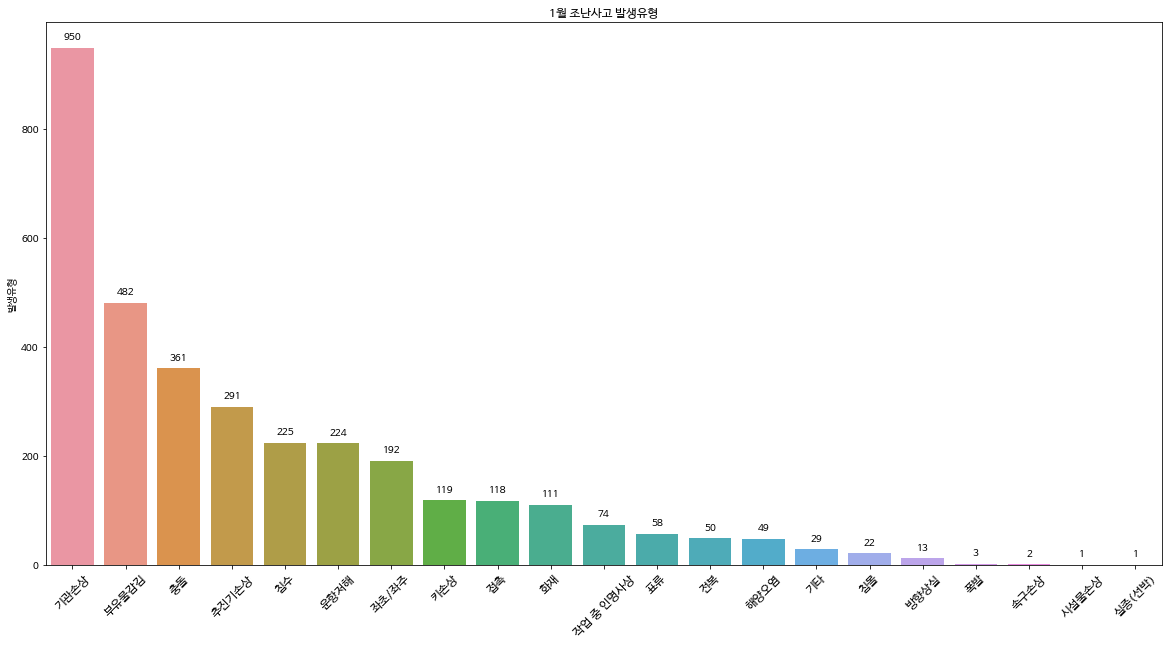

In [136]:
plt.figure(figsize = (20,10))
cause_g_1 = sns.barplot(data = df_cause_1, x=df_cause_1.index, y ='발생유형', ci=None)

for p in cause_g_1.patches:
    cause_g_1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('1월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [81]:
df_cause_2 = df[df['기상상태']=='풍랑주의보']['발생유형'].value_counts().to_frame()
df_cause_2

,발생유형
침수,18
기관손상,17
부유물감김,16
표류,15
좌초/좌주,14
화재,13
전복,9
접촉,4
작업 중 인명사상,4
기타,4


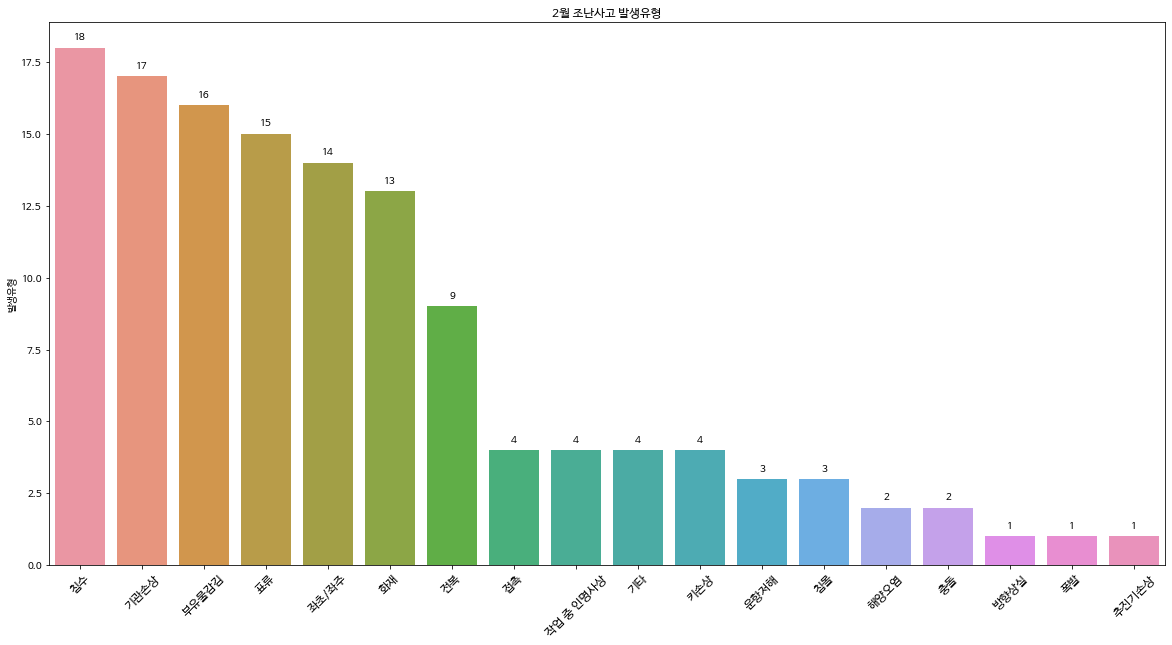

In [135]:
plt.figure(figsize = (20,10))
cause_g_2 = sns.barplot(data = df_cause_2, x=df_cause_2.index, y ='발생유형', ci=None)

for p in cause_g_2.patches:
    cause_g_2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('2월 조난사고 발생유형')  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [83]:
df_cause_3 = df[df['기상상태']=='저시정']['발생유형'].value_counts().to_frame()
df_cause_3

,발생유형
기관손상,16
방향상실,14
충돌,12
부유물감김,9
좌초/좌주,9
운항저해,8
접촉,7
추진기손상,7
침수,6
전복,5


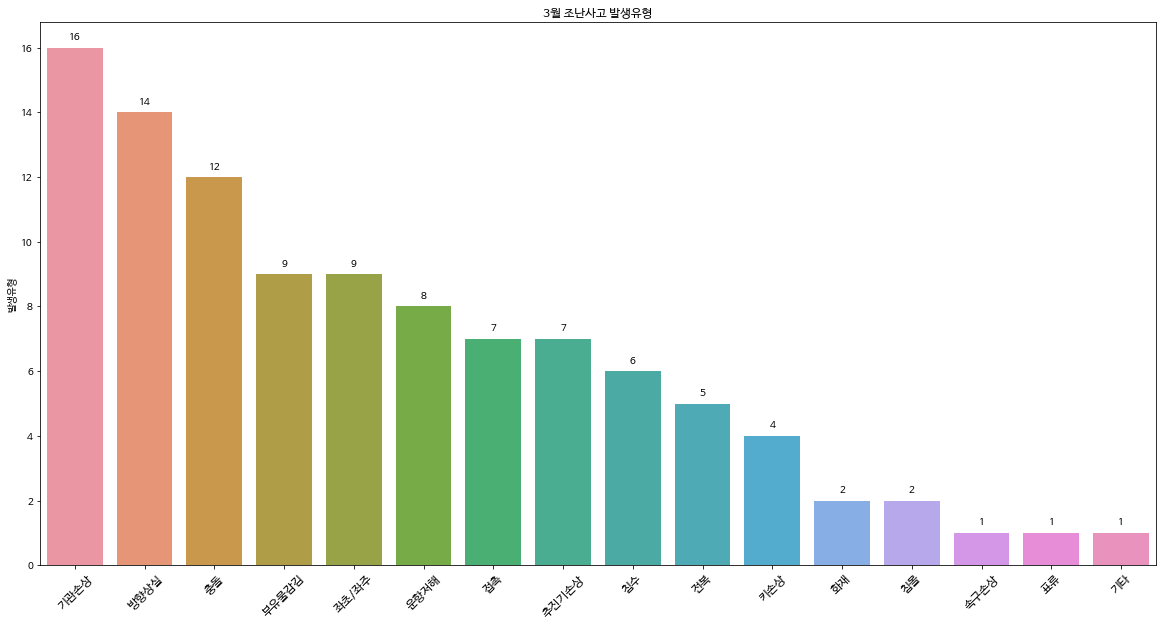

In [137]:
plt.figure(figsize = (20,10))
cause_g_3 = sns.barplot(data = df_cause_3, x=df_cause_3.index, y ='발생유형', ci=None)

for p in cause_g_3.patches:
    cause_g_3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('3월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [85]:
df_cause_4 = df[df['기상상태']=='황천6급']['발생유형'].value_counts().to_frame()
df_cause_4

,발생유형
기관손상,18
화재,5
침수,4
부유물감김,4
추진기손상,3
운항저해,3
충돌,2
표류,2
기타,2
접촉,2


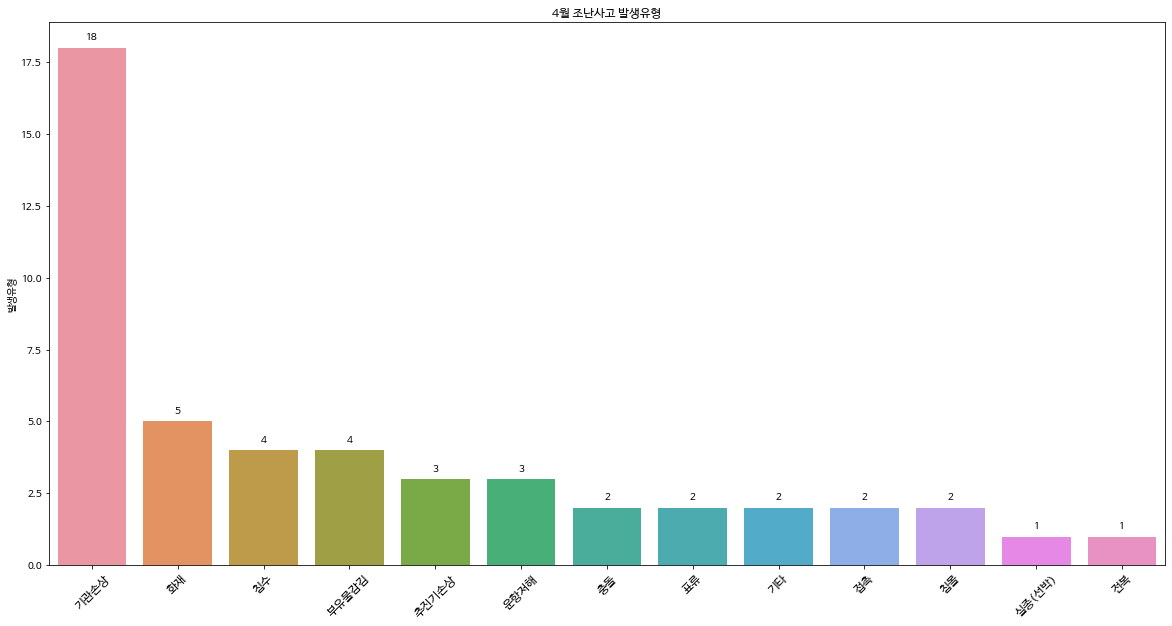

In [138]:
plt.figure(figsize = (20,10))
cause_g_4 = sns.barplot(data = df_cause_4, x=df_cause_4.index, y ='발생유형', ci=None)

for p in cause_g_4.patches:
    cause_g_4.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('4월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [87]:
df_cause_5 = df[df['기상상태']=='태풍경보']['발생유형'].value_counts().to_frame()
df_cause_5

,발생유형
침수,14
전복,5
표류,4
침몰,3
접촉,3
기타,1
부유물감김,1
기관손상,1
좌초/좌주,1


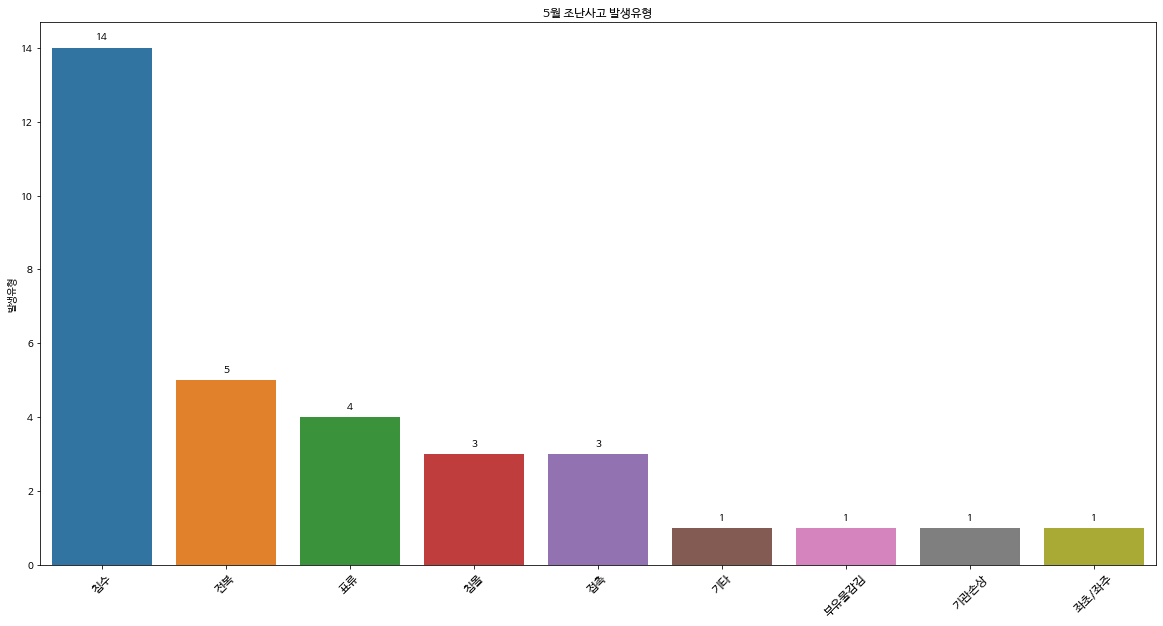

In [139]:
plt.figure(figsize = (20,10))
cause_g_5 = sns.barplot(data = df_cause_5, x=df_cause_5.index, y ='발생유형', ci=None)

for p in cause_g_5.patches:
    cause_g_5.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('5월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [89]:
df_cause_6 = df[df['기상상태']=='황천5급']['발생유형'].value_counts().to_frame()
df_cause_6

,발생유형
기관손상,5
부유물감김,5
전복,5
충돌,4
침수,2
화재,2
키손상,1
운항저해,1
접촉,1
추진기손상,1


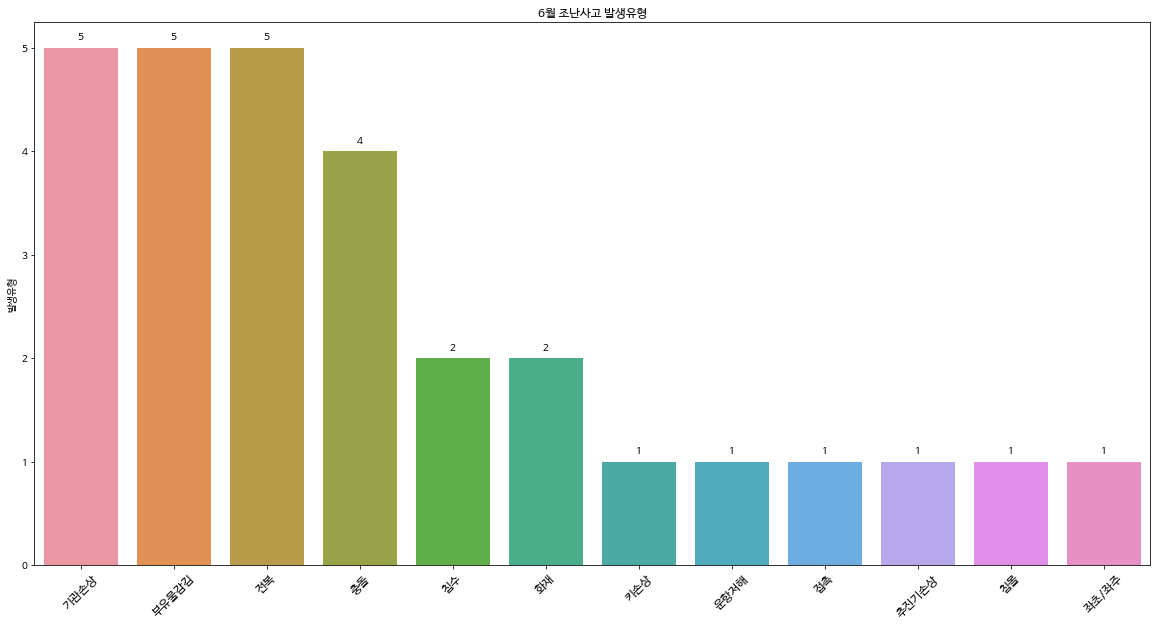

In [140]:
plt.figure(figsize = (20,10))
cause_g_6 = sns.barplot(data = df_cause_6, x=df_cause_6.index, y ='발생유형', ci=None)

for p in cause_g_6.patches:
    cause_g_6.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('6월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [91]:
df_cause_7 = df[df['기상상태']=='풍랑경보']['발생유형'].value_counts().to_frame()
df_cause_7

,발생유형
전복,9
침수,8
표류,3
기관손상,3
기타,2
좌초/좌주,2


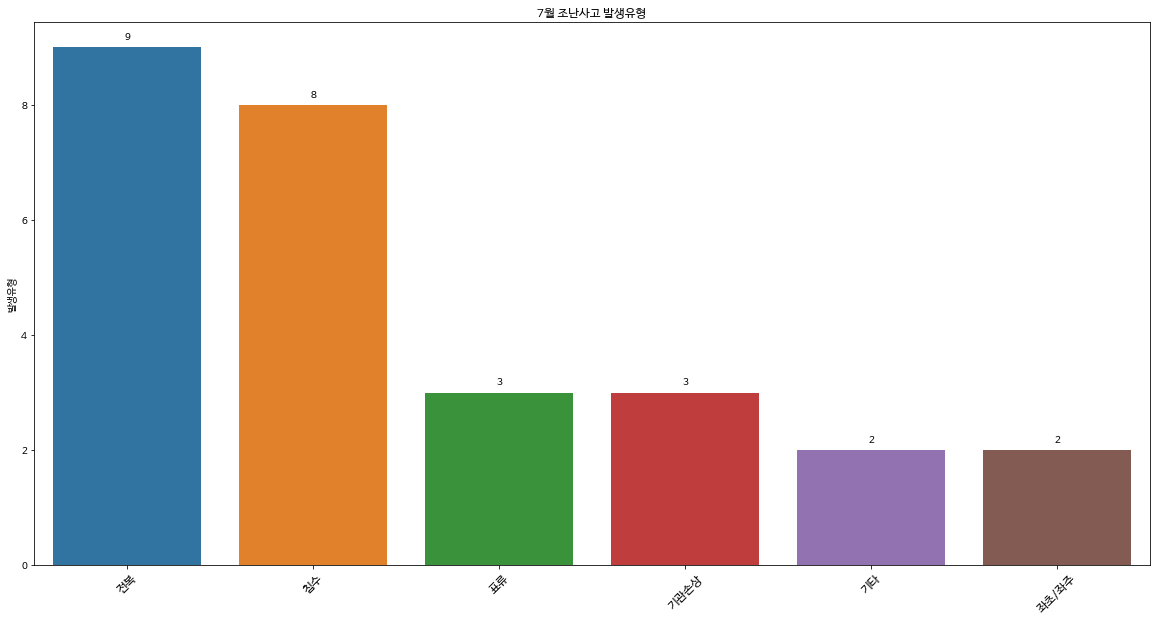

In [141]:
plt.figure(figsize = (20,10))
cause_g_7 = sns.barplot(data = df_cause_7, x=df_cause_7.index, y ='발생유형', ci=None)

for p in cause_g_7.patches:
    cause_g_7.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('7월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [93]:
df_cause_8 = df[df['기상상태']=='황천4급']['발생유형'].value_counts().to_frame()
df_cause_8

,발생유형
침수,16
표류,2
충돌,2
접촉,2
추진기손상,1
부유물감김,1
전복,1
좌초/좌주,1


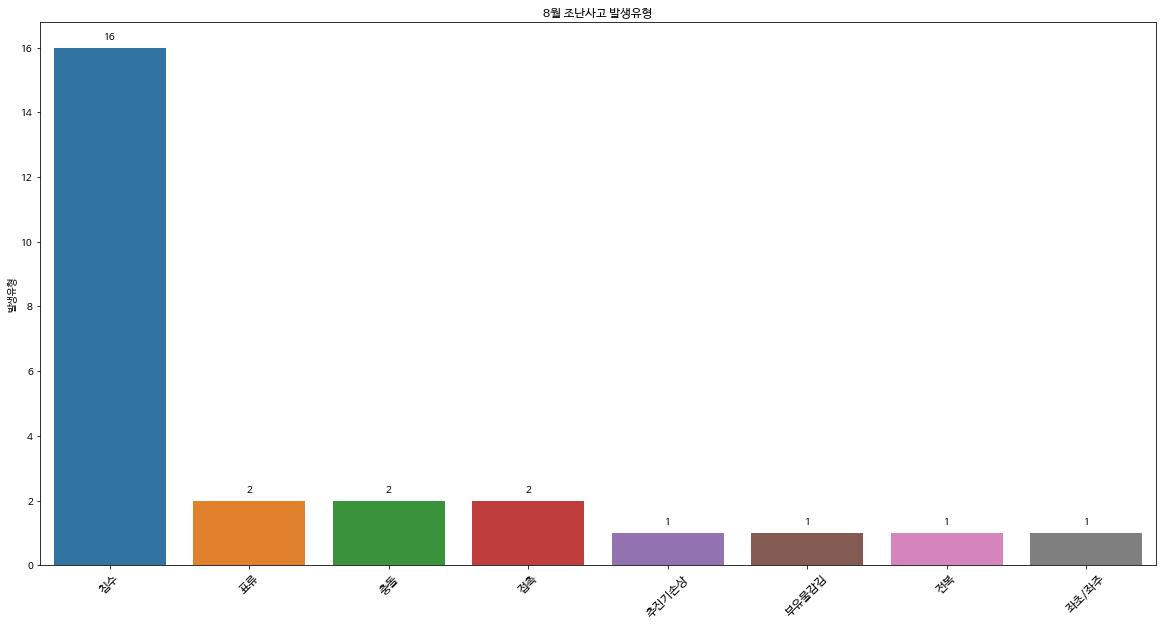

In [142]:
plt.figure(figsize = (20,10))
cause_g_8 = sns.barplot(data = df_cause_8, x=df_cause_8.index, y ='발생유형', ci=None)

for p in cause_g_8.patches:
    cause_g_8.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('8월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [95]:
df_cause_9 = df[df['기상상태']=='태풍주의보']['발생유형'].value_counts().to_frame()
df_cause_9

,발생유형
표류,2
부유물감김,1
전복,1


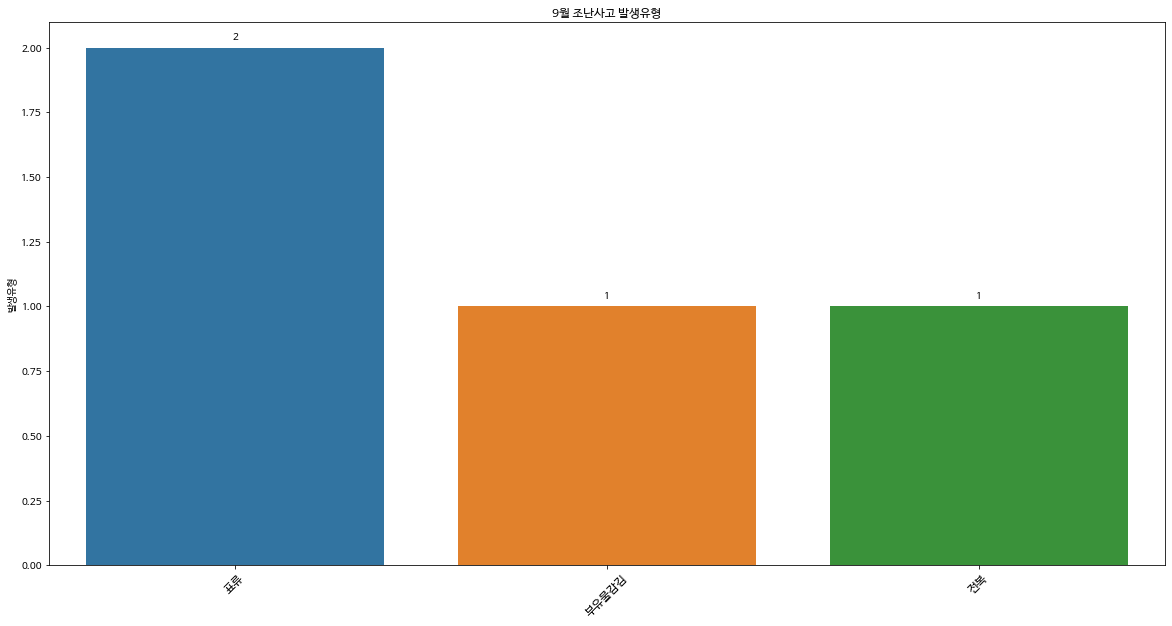

In [144]:
plt.figure(figsize = (20,10))
cause_g_9 = sns.barplot(data = df_cause_9, x=df_cause_9.index, y ='발생유형', ci=None)

for p in cause_g_9.patches:
    cause_g_9.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
plt.title('9월 조난사고 발생유형')   
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

# 해역별 데이터 상관관계 확인

## 해역별로 사고 비율 확인



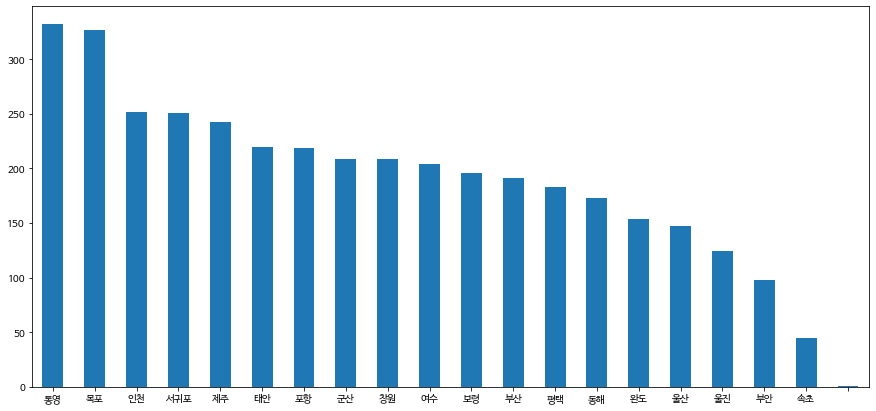

In [97]:
df['관할해경서'].value_counts().plot.bar(figsize = (15,7), rot = 0)

In [170]:
df.loc[df['관할해경서'] == '통영', '해안'] = '남해'
df.loc[df['관할해경서'] == '목포', '해안'] = '서해'
df.loc[df['관할해경서'] == '인천', '해안'] = '서해'
df.loc[df['관할해경서'] == '서귀포', '해안'] = '남해'
df.loc[df['관할해경서'] == '제주', '해안'] = '남해'
df.loc[df['관할해경서'] == '태안', '해안'] = '서해'
df.loc[df['관할해경서'] == '포항', '해안'] = '동해'
df.loc[df['관할해경서'] == '군산', '해안'] = '서해'
df.loc[df['관할해경서'] == '창원', '해안'] = '남해'
df.loc[df['관할해경서'] == '여수', '해안'] = '남해'
df.loc[df['관할해경서'] == '보령', '해안'] = '서해'
df.loc[df['관할해경서'] == '부산', '해안'] = '남해'
df.loc[df['관할해경서'] == '평택', '해안'] = '서해'
df.loc[df['관할해경서'] == '동해', '해안'] = '동해'
df.loc[df['관할해경서'] == '완도', '해안'] = '남해'
df.loc[df['관할해경서'] == '울산', '해안'] = '동해'
df.loc[df['관할해경서'] == '울진', '해안'] = '동해'
df.loc[df['관할해경서'] == '부안', '해안'] = '서해'
df.loc[df['관할해경서'] == '속초', '해안'] = '동해'

In [223]:
df_sea = df['해안'].value_counts().to_frame()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


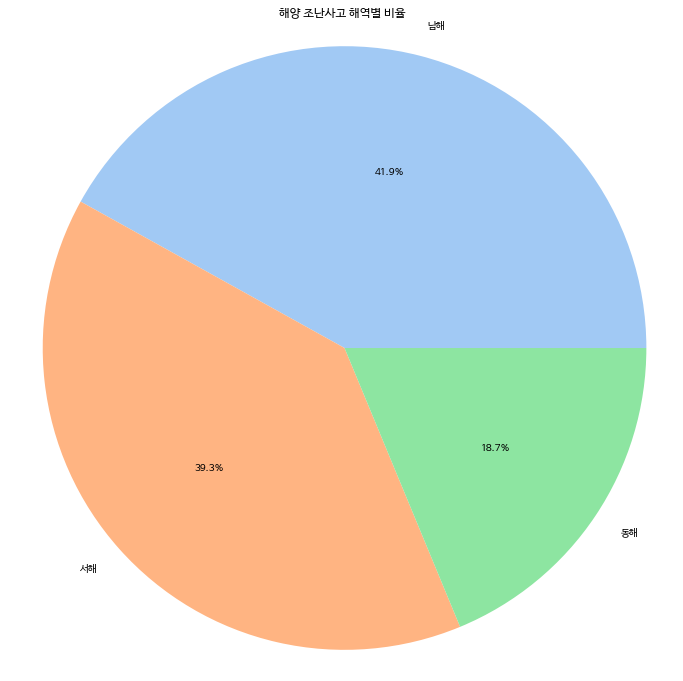

In [224]:
colors = sns.color_palette('pastel')[0:5]

fig = plt.figure(figsize = (12,12))

plt.pie(df_sea.values ,labels = df_sea.index, colors = colors,autopct = "%.1f%%")

plt.title('해양 조난사고 해역별 비율')

plt.axis('equal')
plt.show()

## 발생해역


In [253]:
df['발생해역'].value_counts()

영해        2100
항계 내      1101
영해-EEZ     286
협수로        240
공해          47
외국해역         3
북한해역         1
Name: 발생해역, dtype: int64